# Import

In [1]:
# Torchvision libraries
import torchvision.transforms as transforms

# Torch libraries
import torch
from torch.utils.data import DataLoader
import torch.nn as nn 
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
from torchvision import datasets, transforms


In [2]:
# Torchvision models
from torchvision.models import inception_v3, efficientnet_b3

# Torchvision x-ray models
import torchxrayvision as xrv

# Model evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_curve, auc, log_loss


In [149]:
# Data handeling
import os
import cv2 as cv
import pandas as pd
import numpy as np

# Data visualisation
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
cudnn.benchmark = True
plt.ion()   # interactive mode

In [5]:
USE_GPU = True

In [6]:
torch.cuda.empty_cache()

# Get data

In [7]:
data_transforms_iv3 = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(299), #(299,299)
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(299), #(299,299)
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [8]:
data_transforms_enb3 = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(288),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(228),
        transforms.CenterCrop(288),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(228),
        transforms.CenterCrop(288),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [10]:
data_transforms_dn = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Grayscale(),
        transforms.Normalize([0.5, ], [0.5, ])
    ]),
    'val': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Grayscale(),
        transforms.Normalize([0.5,], [0.5,])
    ]),
    'test': transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Grayscale(),
        transforms.Normalize([0.5, ], [0.5, ])
    ])
}

In [11]:
data_transforms_cnn = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(150),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(150),
        transforms.CenterCrop(150),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(150),
        transforms.CenterCrop(150),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [12]:
data_dir = './input'

In [13]:
image_datasets_iv3 = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms_iv3[x])
    for x in ['train', 'val', 'test']
}

dataloaders_iv3 = {
    x: torch.utils.data.DataLoader(
        image_datasets_iv3[x], batch_size=15,
        shuffle=True, num_workers=10, pin_memory=True)
    for x in ['train', 'val', 'test']
}

In [14]:
image_datasets_enb3 = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms_enb3[x])
    for x in ['train', 'val', 'test']
}

dataloaders_enb3 = {
    x: torch.utils.data.DataLoader(
        image_datasets_enb3[x], batch_size=4, 
        shuffle=True, num_workers=2, pin_memory=True) 
    for x in ['train', 'val', 'test']
}

In [16]:
image_datasets_dn = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms_dn[x])
    for x in ['train', 'val', 'test']
}

dataloaders_dn = {
    x: torch.utils.data.DataLoader(
        image_datasets_dn[x], batch_size=15, 
        shuffle=True, num_workers=10, pin_memory=True) 
    for x in ['train', 'val', 'test']
}

In [17]:
image_datasets_cnn = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms_cnn[x])
    for x in ['train', 'val', 'test']
}

dataloaders_cnn = {
    x: DataLoader(
        image_datasets_cnn[x], batch_size=20, 
        shuffle=True, num_workers=10) 
    for x in ['train', 'val', 'test']
}

In [18]:
dataset_sizes_iv3 = {x: len(image_datasets_iv3[x]) for x in ['train', 'val', 'test']}
class_names_iv3 = image_datasets_iv3['train'].classes

In [19]:
dataset_sizes_enb3 = {x: len(image_datasets_enb3[x]) for x in ['train', 'val', 'test']}
class_names_enb3 = image_datasets_enb3['train'].classes

In [21]:
dataset_sizes_dn = {x: len(image_datasets_dn[x]) for x in ['train', 'val', 'test']}
class_names_dn = image_datasets_dn['train'].classes

In [22]:
dataset_sizes_cnn = {x: len(image_datasets_cnn[x]) for x in ['train', 'val', 'test']}
class_names_cnn = image_datasets_cnn['train'].classes

In [23]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# EDA

In [24]:
mpl.style.use('seaborn-v0_8')

In [ ]:
# ~4 min

root_path = r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input"
num_images = 0
subdirectories = []
sizes = []
resolutions = []
color_distributions = []
imagesNorm = []
imagesPneumonia = []
countNorm = 0
countPneumonia = 0
img_size = 240

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1
            
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)
        
        if dirpath == r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\NORMAL" and countNorm < 5:
            img_path = os.path.join(dirpath, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            imgResized = cv.resize(img, (img_size, img_size))
            imgNormalized = cv.normalize(imgResized, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
            imagesNorm.append(imgNormalized)
            countNorm += 1

        elif dirpath == r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\PNEUMONIA" and countPneumonia < 5:
            img_path = os.path.join(dirpath, filename)
            img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
            imgResized = cv.resize(img, (img_size, img_size))
            imgNormalized = cv.normalize(imgResized, None, 0, 1.0, cv.NORM_MINMAX, dtype=cv.CV_32F)
            imagesPneumonia.append(imgNormalized)
            countPneumonia += 1

    # Print the number of image files in the current subdirectory
    if num_images > 0:
        if dirpath == r"C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\NORMAL":
            subdirectories.append(['Test', num_images, 'Normal', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\test\PNEUMONIA':
            subdirectories.append(['Test', num_images, 'Pneumonia', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\train\NORMAL':
            subdirectories.append(['Train', num_images, 'Normal', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\train\PNEUMONIA':
            subdirectories.append(['Train', num_images, 'Pneumonia', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\val\NORMAL':
            subdirectories.append(['Validation', num_images, 'Normal', dirpath])

        elif dirpath == r'C:\Users\laerk\OneDrive\Dokumenter\CBS\Master\2. semester\Algorithms\AI_Exam\input\val\PNEUMONIA':
            subdirectories.append(['Validation', num_images, 'Pneumonia', dirpath])

        # print(f"Found {num_images} images in directory: {dirpath}")
        num_images = 0
    else: 
        num_images = 0

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

In [ ]:
# Create arrays for plotting 
titles = ['Test', 'Train', 'Validation']
normal = []
pneumonia = []
directories = {}

for i in subdirectories:
    if i[0] == 'Test' and i[2] == 'Normal':
        normal.append(i[1])

        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]
        
    elif i[0] == 'Test' and i[2] == 'Pneumonia':
        pneumonia.append(i[1])

        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Train' and i[2] == 'Normal':
        normal.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Train' and i[2] == 'Pneumonia':
        pneumonia.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Validation' and i[2] == 'Normal':
        normal.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]

    elif i[0] == 'Validation' and i[2] == 'Pneumonia':
        pneumonia.append(i[1])
        
        tmp = i[0] + ' - ' + i[2]
        directories[tmp] = i[3]


## Plotting normal and pneumonia pictures

In [ ]:
fig = plt.figure(figsize=(15, 8)) 

rows = 2
columns = 4

interpolation = 'None'

for i in range(4):
    tmpPosition = i+1
    tmpExample = i+1
    fig.add_subplot(rows, columns, tmpPosition) 
    plt.imshow(cv.cvtColor(imagesNorm[i], cv.COLOR_BGR2RGB), interpolation = interpolation, cmap='gray')
    plt.grid(color='white', linestyle='--', linewidth=.6)
    plt.title("Normal example: " + str(tmpExample))

for i in range(4):
    tmpPosition = i+5
    tmpExample = i+1
    fig.add_subplot(rows, columns, tmpPosition) 
    plt.imshow(cv.cvtColor(imagesPneumonia[i], cv.COLOR_BGR2RGB), interpolation = interpolation, cmap='gray')
    plt.grid(color='white', linestyle='--', linewidth=.6)
    plt.title("Pneumonia example: " + str(tmpExample))

plt.savefig('./plots/EDA/normal_pneumonia_examples.png')
plt.show()

## Plotting destribution of images in Test, Train, and Validation

In [ ]:
# Create a bar chart to visualize the distribution
plt.bar(titles, normal, zorder=3)
plt.bar(titles, pneumonia, bottom=normal, zorder=3)
plt.legend(['Normal', 'Pneumonia'])
plt.ylabel("Number of Images")
plt.xlabel('Data type')
plt.grid(linestyle = '--', zorder=0, linewidth=.6)
plt.title('Destribution of category in Test, Train, and Validation')
plt.savefig('./plots/EDA/normal_pneumonia_examples.png')
plt.savefig('./plots/EDA/normal_pneumonia_destribution.png')
plt.show()

## Plotting image size destribution

In [ ]:
# Plot a histogram of the image sizes
plt.hist(sizes, edgecolor='white')
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.savefig('./plots/EDA/image_size_destribution.png')

plt.show()

## Plotting image resolution destribution 

In [ ]:

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1], edgecolors='white', linewidths=0.7)
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.savefig('./plots/EDA/image_resolution_destribution.png')
plt.show()

## Plotting image color destribution

In [ ]:

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.savefig('./plots/EDA/image_color_destribution.png')
plt.show()

File size 

https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a

https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b

Normalizing images: https://www.tutorialspoint.com/how-to-normalize-an-image-in-opencv-python 

Showing images: https://www.kaggle.com/code/madz2000/pneumonia-detection-using-cnn-92-6-accuracy

# Functions

functions: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Training the model

In [218]:
# https://machinelearningmastery.com/using-learning-rate-schedule-in-pytorch-training/

criterion = nn.CrossEntropyLoss()

def train(model, dataloader, optimizer, scheduler, epocs, data_size, model_name):
    model_acc = 0
    min_val_loss = float('inf')
    patience = 5
    patience_counter = 0

    for epoc in range(epocs):
        train_loss = 0.0
        val_loss = 0.0
        train_acc_running = 0
        val_acc_running = 0
        
        epoc_num = epoc+1
        print('Epoch {0} of {1}'. format(epoc_num, epocs))

        model.train()
        print('-'*10)
        print('Training initiated')
        for i, (inputs, labels) in enumerate(dataloader['train']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            output = model(inputs)
            loss = criterion(output, labels)
            _, pred = torch.max(output, 1)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            train_acc_running += torch.sum(pred == labels.data)

        before_lr = optimizer.param_groups[0]["lr"]
        scheduler.step()
        after_lr = optimizer.param_groups[0]["lr"]

        print('*')
        print("Epoch %d: Adam lr %.4f -> %.4f" % (epoc_num, before_lr, after_lr))
        print('*')
        
        model.eval()
        print('Validation initiated')
        for i, (inputs, labels) in enumerate(dataloader['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            output = model(inputs)
            loss = criterion(output, labels)
            _, pred = torch.max(output, 1)
            val_loss = loss.item() * inputs.size(0)
            val_acc_running += torch.sum(pred == labels.data)

        training_loss = train_loss/data_size['train']
        validation_loss = val_loss/data_size['val']

        training_acc = train_acc_running.double()/data_size['train']
        validation_acc = val_acc_running.double()/data_size['val']
        
        print('*')
        print('Training Loss: %.4f - Training accuracy: %.4f' % (training_loss, training_acc))
        print('Validation Loss: %.4f - Validation accuracy: %.4f' % (validation_loss, validation_acc))
        print('*')
        
        if validation_loss < min_val_loss:
            print('Validation loss decreased: %.4f -> %.4f' % (min_val_loss, validation_loss))
            print('Current validation accuracy: %.4f' % validation_acc)
            print('Saving The Model...')
            print()

            # Saving State Dict
            torch.save(model.state_dict(), './models/{0}.pth'.format(model_name))

            min_val_loss = validation_loss
            model_acc = validation_acc
            patience_counter = 0

        else:
            patience_counter += 1

            if patience_counter >= patience:
                print('Model breatkout')
                print('Chosen model has a validation accuracy of: %.4f' % (model_acc))
                print('Chosen model has a validation loss of: %.4f' % (min_val_loss))
                return
    
    print('Chosen model has a validation accuracy of: %.4f' % (model_acc))
    print('Chosen model has a validation loss of: %.4f' % (min_val_loss))


## Visualising data

In [153]:
def imshow(inp):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
        
    return inp

In [154]:
def visualize_prediction(model, dataloaders, class_names, model_name, save_name, num_images=6):
    was_training = model.training 
    model.eval()
    images_so_far = 0
    columns = 3

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                plt.subplot(2, columns, images_so_far)
                plt.axis('off')
                plt.title(f'predicted: {class_names[preds[j]]} \n actual: {class_names[labels[j]]}', fontsize=10)
                plt.imshow(imshow(inputs.cpu().data[j]))
                

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    plt.suptitle('Guesses of the {0} model'.format(model_name), fontsize=17)
                    plt.savefig('./plots/models/predictions/visualize_prediction-{0}.png'.format(save_name))
                    plt.show()
                    return
        model.train(mode=was_training)

In [155]:
def plotHeatmap(y_true, y_pred, name, training):
    '''Function that creates a heatmap based on the matrix prediction results for the given dataset'''
    # Declaring the classes
    classes = ('Normal', 'Pneumonia')

    # Calculating the confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    
    # Creating a dataframe based on the confusion matrix results and the class names 
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                    columns = [i for i in classes])
    
    # Declaring the size and type of the plot
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)

    # Adding a title for the plot and saving it in the plots folder 
    plt.title('Heatmap for {0} ({1})'.format(name, training))
    plt.savefig('./plots/models/matrix-heatmap/{0}-matrix-{1}.png'.format(name, training))
    plt.show()

In [156]:
def plotROC(fpr_test, fpr_train, fpr_val, tpr_test, tpr_train, tpr_val, auc_test, auc_train, auc_val, training):
    '''Function that plots the true positive rate and the false positive rate (ROC) for each dataset in three subplots.'''
    plt.figure(figsize=(15, 6))
    
    # Plotting the ROC for the test data in subplot 1
    plt.subplot(1, 3, 1)
    plt.plot(fpr_test, tpr_test, label="AUC = "+str(auc_test))
    
    # Adding a comparative straight line for comparison
    plt.plot([0, 1], [0, 1], linestyle="--", label="AUC (chance) = 0.5")
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Test dataset')
    plt.legend()
    plt.ylim(-0.05,1.05)

    # Plotting the ROC for the train data in subplot 2
    plt.subplot(1, 3, 2)
    plt.plot(fpr_train, tpr_train, label="AUC ="+str(auc_train))
    # Adding a comparative straight line for comparison
    plt.plot([0, 1], [0, 1], linestyle="--", label="AUC (chance) = 0.5")
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Training dataset')
    plt.legend()
    plt.ylim(-0.05,1.05)

    # Plotting the ROC for the val data in subplot 3
    plt.subplot(1, 3, 3)
    plt.plot(fpr_val, tpr_val, label="AUC = "+str(auc_val))
    # Adding a comparative straight line for comparison
    plt.plot([0, 1], [0, 1], linestyle="--", label="AUC (chance) = 0.5")
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Validation dataset')
    plt.legend()
    plt.ylim(-0.05,1.05)
    
    # Adding a title for the whole plot and saving it in the plots folder 
    plt.suptitle('ROC ({0})'.format(training))
    plt.savefig('./plots/models/ROC/ROC-{0}.png'.format(training))
    plt.show()

In [157]:
def plotScores(acc_lst, rec_lst, pre_lst, acc, rec, pre, name, training):
# def plotScores(steps_lst, acc_lst, rec_lst, pre_lst, acc, rec, pre, name):
    '''Function that plots the accuracy, recall, and precision for a given dataset, in three subplots.'''
    plt.figure(figsize=(15, 6))
    
    # Plotting the accuracy score in subplot 1
    plt.subplot(1, 3, 1)
    plt.plot(acc_lst, label='Accuracy = '+str(acc))
    plt.legend() 
    plt.title('Accuracy for {0}'.format(name))
    plt.xlabel('Steps')
    plt.ylabel('Score')
    plt.ylim(-0.05,1.05)

    # Plotting the recall score in subplot 2
    plt.subplot(1, 3, 2)
    plt.plot(rec_lst, label='Sensitivity = '+str(rec))
    plt.legend() 
    plt.title('Sensitivity for {0}'.format(name))
    plt.xlabel('Steps')
    plt.ylabel('Score')
    plt.ylim(-0.05,1.05)

    # Plotting the precision score in subplot 3
    plt.subplot(1, 3, 3)
    plt.plot(pre_lst, label='Specificity = '+str(pre))
    plt.legend() 
    plt.title('Specificity for {0}'.format(name))
    plt.xlabel('Steps')
    plt.ylabel('Score')
    plt.ylim(-0.05,1.05)

    # Adding a title for the whole plot and saving it in the plots folder 
    plt.suptitle('Scores for {0} ({1})'.format(name, training))
    plt.savefig('./plots/models/scores/{0}-scores-{1}.png'.format(name, training))
    plt.show()

In [158]:
def plotAccLoss(acc_lst_train, acc_lst_test, acc_lst_val, loss_lst_train, loss_lst_test, loss_lst_val, acc_train, acc_test, acc_val, loss_train, loss_test, loss_val, training):
    '''Function that plots the accuracy and loss for each dataset, in three subplots for easy comparison.'''
    plt.figure(figsize=(15, 6))
    
    # Plotting accuracy and loss for the test data in subplot 1
    plt.subplot(1, 3, 1)
    plt.plot(acc_lst_test, label='Accuracy = '+str(acc_test))
    plt.plot(loss_lst_test, label='Loss = '+str(loss_test))
    plt.legend()
    plt.title('Accuracy and Loss for Testing data')
    plt.xlabel('Steps')
    plt.ylabel('Score')
    plt.ylim(-0.05,1.05)

    # Plotting accuracy and loss for the train data in subplot 2
    plt.subplot(1, 3, 2)
    plt.plot(acc_lst_train, label='Accuracy = '+str(acc_train))
    plt.plot(loss_lst_train, label='Loss = '+str(loss_train))
    plt.legend()
    plt.title('Accuracy and Loss for Training data')
    plt.xlabel('Steps')
    plt.ylabel('Score')
    plt.ylim(-0.05,1.05)

    # Plotting accuracy and loss for the val data in subplot 3
    plt.subplot(1, 3, 3)
    plt.plot(acc_lst_val, label='Accuracy = '+str(acc_val))
    plt.plot(loss_lst_val, label='Loss = '+str(loss_val))
    plt.legend()
    plt.title('Accuracy and Loss for Validation data')
    plt.xlabel('Steps')
    plt.ylabel('Score')
    plt.ylim(-0.05,1.05)

    # Adding a title for the whole plot and saving it in the plots folder
    plt.suptitle('Accuracy and Loss ({0})'.format(training))
    plt.savefig('./plots/models/accuracy-loss/accuracy-loss-{0}.png'.format(training))
    plt.show()

## Evaluating models

In [171]:
def history(steps, y_true, y_pred):
    '''Function that iterates through the length of the data and makes a running prediction and saving the prediction score to a list.
    The function returns the accuracy list, recall list, precision list, loss list, false positive rate list, true positive rate list and AUC score.'''
    # Declaring all the lists
    acc_lst = []
    rec_lst = []
    pre_lst = []
    loss_lst = []
    tmp_true = []
    tmp_pred = []
    fpr_lst = [0]
    tpr_lst = [0]

    for i in range(steps):
        # Adding the current actual label and the predicted label to the temporery lists
        tmp_true.append(y_true[i])
        tmp_pred.append(y_pred[i])

        # Running all scoretypes and saves it to their individual lists
        acc_lst.append(round(accuracy_score(tmp_true, tmp_pred),4))
        rec_lst.append(round(recall_score(tmp_true, tmp_pred), 4))
        pre_lst.append(round(precision_score(tmp_true, tmp_pred),4))

        loss_tmp = log_loss(tmp_true, tmp_pred, labels=(0,1))
        loss_lst.append(loss_tmp/100)

        # Getting the true positive rate and the false positive rate from the temporery lists
        fpr_tmp, tpr_tmp, _ = roc_curve(tmp_true, tmp_pred)

        fpr_tmp = fpr_tmp[1]
        tpr_tmp = tpr_tmp[1]

        if fpr_tmp == fpr_lst[-1]:
            tpr_lst[-1] = tpr_tmp
        elif tpr_tmp == tpr_lst[-1]:
            fpr_lst[-1] = fpr_tmp
        elif fpr_tmp > 0:
            fpr_lst.append(fpr_tmp)
            tpr_lst.append(tpr_tmp)
            fpr_lst.sort()
            tpr_lst.sort()
        else:
            fpr_lst.append(0)
            tpr_lst.append(tpr_tmp)
            fpr_lst.sort()
            tpr_lst.sort()

    # Calcularing the AUC score for the whole model
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc_score = auc(fpr, tpr)
    auc_score = round(auc_score,4)
    print(auc_score)

    # Adding 1 to the false positive rate and true positive rate lists
    fpr_lst.append(1)
    tpr_lst.append(1)

    fpr_lst.sort()
    tpr_lst.sort()

    print('fpr_lst')
    print(fpr_lst)
    print('tpr_lst')
    print(tpr_lst)

    return acc_lst, rec_lst, pre_lst, loss_lst, fpr_lst, tpr_lst, auc_score 

In [161]:
def plotting(model, dataloader, training):
        '''Function that prepares the data for plotting and evaluation scores, by adding the inputs and lables of all datasets into individual lists 
        and using them in different functions.
        The function returns a dictionary with the accuracy, recall, precision, logloss, and AUC scores for each dataset.'''
        model.eval()
        
        # Declaring all the lists
        y_pred_train = []
        y_true_train = []
        y_pred_val = []
        y_true_val = []
        y_pred_test = []
        y_true_test = []

        # iterate over test data
        for inputs, labels in dataloader['train']:                
                output = model(inputs.to(device)) # Feed Network

                output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
                y_pred_train.extend(output) # Save Prediction
                
                labels = labels.data.cpu().numpy()
                y_true_train.extend(labels) # Save Truth

        for inputs, labels in dataloader['val']:
                output = model(inputs.to(device)) # Feed Network

                output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
                y_pred_val.extend(output) # Save Prediction
                
                labels = labels.data.cpu().numpy()
                y_true_val.extend(labels) # Save Truth

        for inputs, labels in dataloader['test']:
                output = model(inputs.to(device)) # Feed Network

                output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
                y_pred_test.extend(output) # Save Prediction
                
                labels = labels.data.cpu().numpy()
                y_true_test.extend(labels) # Save Truth

        # Creating steps for iteration
        steps_train = len(y_pred_train) 
        # step_train = np.arange(steps_train)

        steps_val = len(y_pred_val) 
        # step_val = np.arange(steps_val)

        steps_test = len(y_pred_test) 
        # step_test = np.arange(steps_test)

        # Creating lists of score data for every prediction
        acc_train, rec_train, pre_train, loss_train, fpr_train, tpr_train, auc_train  = history(steps_train, y_true_train, y_pred_train)
        acc_val, rec_val, pre_val, loss_val, fpr_val, tpr_val, auc_val = history(steps_val, y_true_val, y_pred_val)
        acc_test, rec_test, pre_test, loss_test, fpr_test, tpr_test, auc_test = history(steps_test, y_true_test, y_pred_test)

        # Calculate general scores for datasets 
        accuracy_test = accuracy_score(y_true_test, y_pred_test)
        recall_test = recall_score(y_true_test, y_pred_test, average='binary') # Also called sensitivity
        precision_test = precision_score(y_true_test, y_pred_test, average='binary') # Also called specificity
        logloss_test = log_loss(y_true_test, y_pred_test)
        logloss_test = logloss_test/100

        accuracy_train = accuracy_score(y_true_train, y_pred_train)
        recall_train = recall_score(y_true_train, y_pred_train, average='binary') # Also called sensitivity
        precision_train = precision_score(y_true_train, y_pred_train, average='binary') # Also called specificity
        logloss_train = log_loss(y_true_train, y_pred_train)
        logloss_train = logloss_train/100

        accuracy_val = accuracy_score(y_true_val, y_pred_val)
        recall_val = recall_score(y_true_val, y_pred_val, average='binary') # Also called sensitivity
        precision_val = precision_score(y_true_val, y_pred_val, average='binary') # Also called specificity
        logloss_val = log_loss(y_true_val, y_pred_val)
        logloss_val = logloss_val/100

        # Rounding for easier visualisation 
        accuracy_test = round(accuracy_test,4)
        recall_test = round(recall_test,4) # Also called sensitivity
        precision_test = round(precision_test,4) # Also called specificity
        logloss_test = round(logloss_test,4)

        accuracy_train = round(accuracy_train,4)
        recall_train = round(recall_train,4) # Also called sensitivity
        precision_train = round(precision_train,4) # Also called specificity
        logloss_train = round(logloss_train,4)

        accuracy_val = round(accuracy_val,4)
        recall_val = round(recall_val,4) # Also called sensitivity
        precision_val = round(precision_val,4) # Also called specificity
        logloss_val = round(logloss_val,4)

        # Plotting ROC 
        plotROC(fpr_test, fpr_train, fpr_val, tpr_test, tpr_train, tpr_val, auc_test, auc_train, auc_val, training)

        # Plotting Matrix
        plotHeatmap(y_true_train, y_pred_train, 'Training dataset', training)
        plotHeatmap(y_true_test, y_pred_test, 'Testing dataset', training)
        plotHeatmap(y_true_val, y_pred_val, 'Validation dataset', training)
        
        # Plotting scores
        plotScores(acc_test, rec_test, pre_test, accuracy_test, recall_test, precision_test, 'Testing dataset', training)
        plotScores(acc_train, rec_train, pre_train, accuracy_train, recall_train, precision_train, 'Training dataset', training)
        plotScores(acc_val, rec_val, pre_val, accuracy_val, recall_val, precision_val, 'Validation dataset', training)

        # Plotting accuracy and loss
        plotAccLoss(acc_train, acc_test, acc_val, loss_train, loss_test, loss_val, accuracy_train, accuracy_test, accuracy_val, logloss_train, logloss_test, logloss_val, training)

        # Collecting all scores
        scores = {
                'test': [accuracy_test*100, recall_test*100, precision_test*100, logloss_test*100, auc_test],
                'train': [accuracy_train*100, recall_train*100, precision_train*100, logloss_train*100, auc_train],
                'val': [accuracy_val*100, recall_val*100, precision_val*100, logloss_val*100, auc_val]
        }

        return scores


# Modelling

In [205]:
# This criterion computes the cross entropy loss between input logits and target. Works well for unbalanced trainingset 
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html#torch.nn.CrossEntropyLoss
lr = 0.05
epocs = 15
total_iters = epocs-1

## InceptionV3

### Base model

In [40]:
# Initialising model without weights (not pretrained)
iv3_base = inception_v3(weights=None)

iv3_base = iv3_base.to(device)

iv3_base.aux_logits=False

In [41]:
# Adam optimizer chosen as it is good for complex models
iv3_base_optimizer = optim.Adam(iv3_base.parameters(), lr=lr)

# Learning rate stepper 
iv3_base_exp_lr_scheduler = lr_scheduler.LinearLR(iv3_base_optimizer, start_factor=1.0, end_factor=0.5, total_iters=total_iters)

In [42]:
train(iv3_base, dataloaders_iv3, iv3_base_optimizer, iv3_base_exp_lr_scheduler, epocs, dataset_sizes_iv3, 'InceptionV3-base')

Epoch 1 of 15
----------
Training initiated


*
Epoch 1: Adam lr 0.0500 -> 0.0482
*
Validation initiated
*
Training Loss: 0.0920 - Training accuracy: 0.6969
Validation Loss: 0.0276 - Validation accuracy: 0.5000
*
Validation loss decreased: inf -> 0.0276
Current validation accuracy: 0.5000
Saving The Model...

Epoch 2 of 15
----------
Training initiated
*
Epoch 2: Adam lr 0.0482 -> 0.0464
*
Validation initiated
*
Training Loss: 0.0894 - Training accuracy: 0.7076
Validation Loss: 0.0244 - Validation accuracy: 0.5000
*
Validation loss decreased: 0.0276 -> 0.0244
Current validation accuracy: 0.5000
Saving The Model...

Epoch 3 of 15
----------
Training initiated
*
Epoch 3: Adam lr 0.0464 -> 0.0446
*
Validation initiated
*
Training Loss: 0.0571 - Training accuracy: 0.7097
Validation Loss: 0.0014 - Validation accuracy: 0.5000
*
Validation loss decreased: 0.0244 -> 0.0014
Current validation accuracy: 0.5000
Saving The Model...

Epoch 4 of 15
----------
Training initiated
*
Epoch 4: Adam lr 0.0446 -> 0.0429
*
Validation initiated
*
Traini

In [43]:
torch.cuda.empty_cache()

### Pretrained model

In [44]:
# Initialising model with weights (pretrained)
iv3_pretrained = inception_v3(weights="DEFAULT")

iv3_pretrained = iv3_pretrained.to(device)

iv3_pretrained.aux_logits=False

In [45]:
# Adam optimizer chosen as it is good for complex models
iv3_pretrained_optimizer = optim.Adam(iv3_pretrained.parameters(), lr=lr)

# Learning rate stepper 
iv3_pretrained_exp_lr_scheduler = lr_scheduler.LinearLR(iv3_base_optimizer, start_factor=1.0, end_factor=0.5, total_iters=total_iters)


In [46]:
train(iv3_pretrained, dataloaders_iv3, iv3_pretrained_optimizer, iv3_pretrained_exp_lr_scheduler, epocs, dataset_sizes_iv3, 'InceptionV3-pretrained')

Epoch 1 of 15
----------
Training initiated
*
Epoch 1: Adam lr 0.0500 -> 0.0500
*
Validation initiated
*
Training Loss: 0.0844 - Training accuracy: 0.6735
Validation Loss: 0.0623 - Validation accuracy: 0.5000
*
Validation loss decreased: inf -> 0.0623
Current validation accuracy: 0.5000
Saving The Model...

Epoch 2 of 15
----------
Training initiated
*
Epoch 2: Adam lr 0.0500 -> 0.0500
*
Validation initiated
*
Training Loss: 0.0562 - Training accuracy: 0.7122
Validation Loss: 0.0198 - Validation accuracy: 0.5625
*
Validation loss decreased: 0.0623 -> 0.0198
Current validation accuracy: 0.5625
Saving The Model...

Epoch 3 of 15
----------
Training initiated
*
Epoch 3: Adam lr 0.0500 -> 0.0500
*
Validation initiated
*
Training Loss: 0.0487 - Training accuracy: 0.7337
Validation Loss: 0.0847 - Validation accuracy: 0.5000
*
Epoch 4 of 15
----------
Training initiated
*
Epoch 4: Adam lr 0.0500 -> 0.0500
*
Validation initiated
*
Training Loss: 0.0394 - Training accuracy: 0.7396
Validation Lo

In [44]:
torch.cuda.empty_cache()

### Evaluation

#### Load models

In [172]:
iv3_base = inception_v3()
iv3_base.load_state_dict(torch.load('./models/InceptionV3-base.pth'))

iv3_base = iv3_base.to(device)

In [173]:
iv3_pretrained = inception_v3()
iv3_pretrained.load_state_dict(torch.load('./models/InceptionV3-pretrained.pth'))

iv3_pretrained = iv3_pretrained.to(device)

#### Get scores and plots

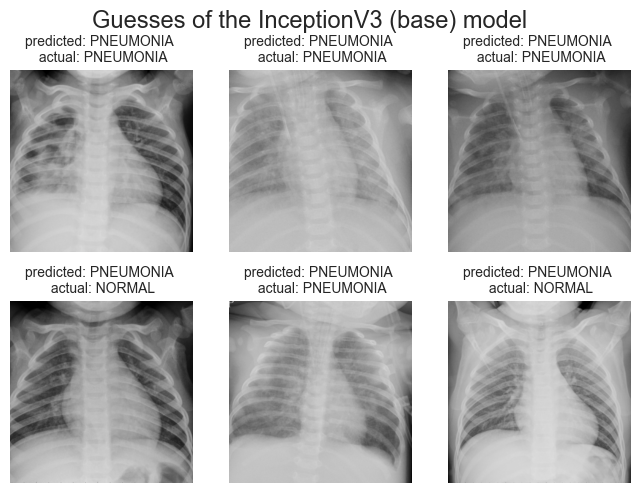

In [176]:
visualize_prediction(iv3_base, dataloaders_iv3, class_names_iv3, 'InceptionV3 (base)', 'InceptionV3-base')

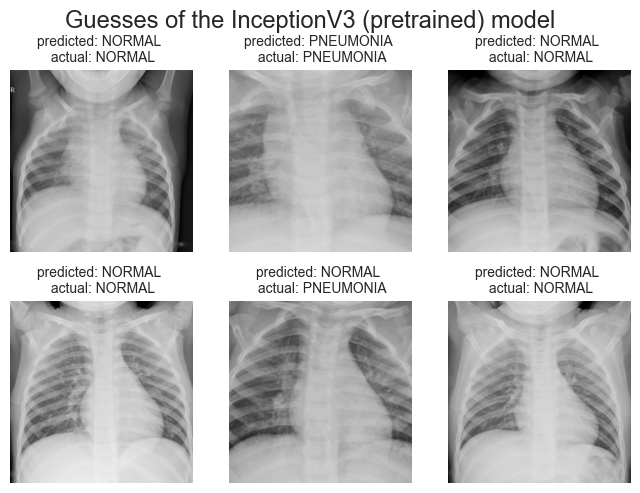

In [177]:
visualize_prediction(iv3_pretrained, dataloaders_iv3, class_names_iv3, 'InceptionV3 (pretrained)', 'InceptionV3-pretrained')

0.4975
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 0.9950967741935484, 1]
0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]
0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x000002C753B4EF70>
Traceback (most recent call last):
  File "c:\Users\laerk\miniconda3\envs\torchenvTrue\lib\site-packages\torch\utils\data\dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "c:\Users\laerk\miniconda3\envs\torchenvTrue\lib\site-packages\torch\utils\data\dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'


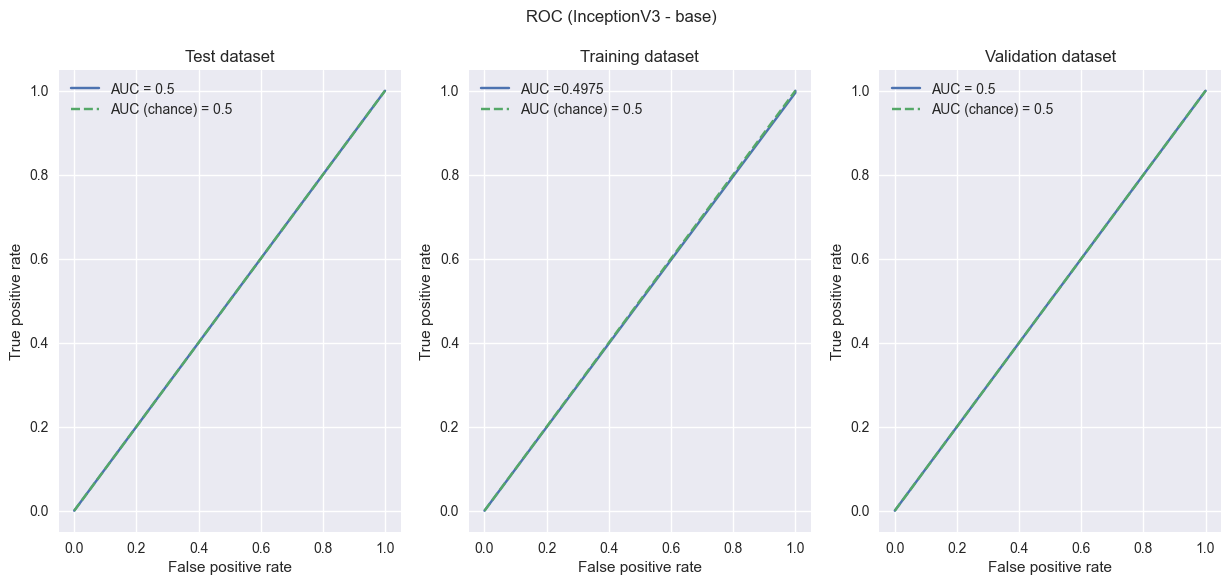

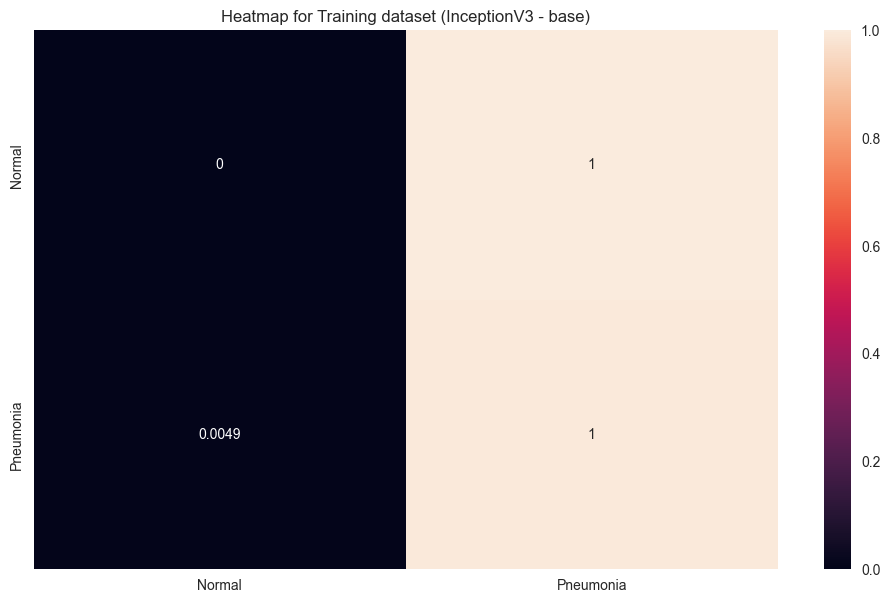

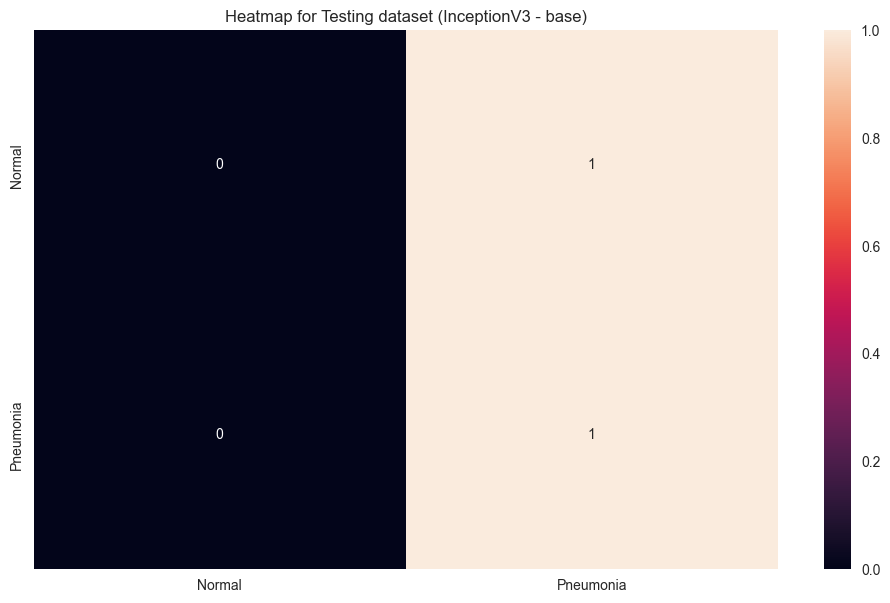

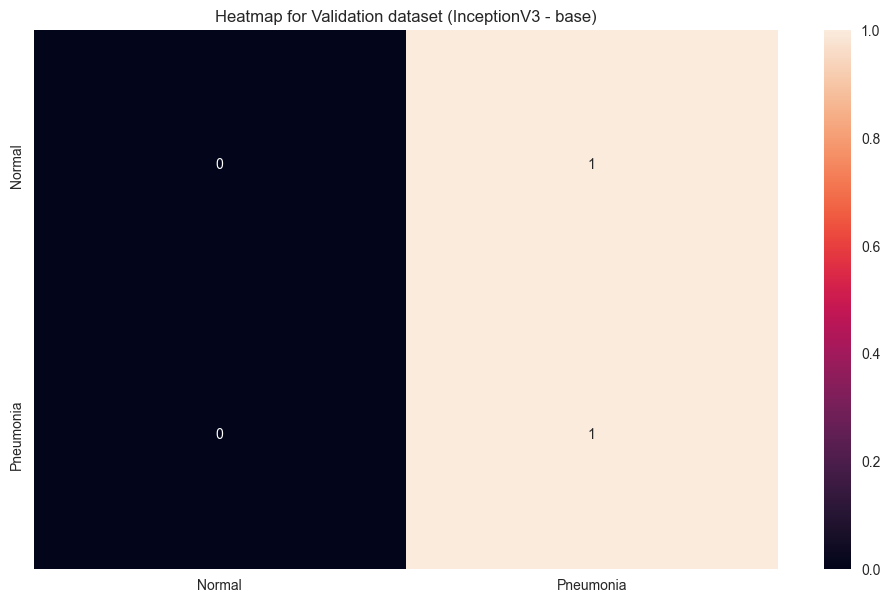

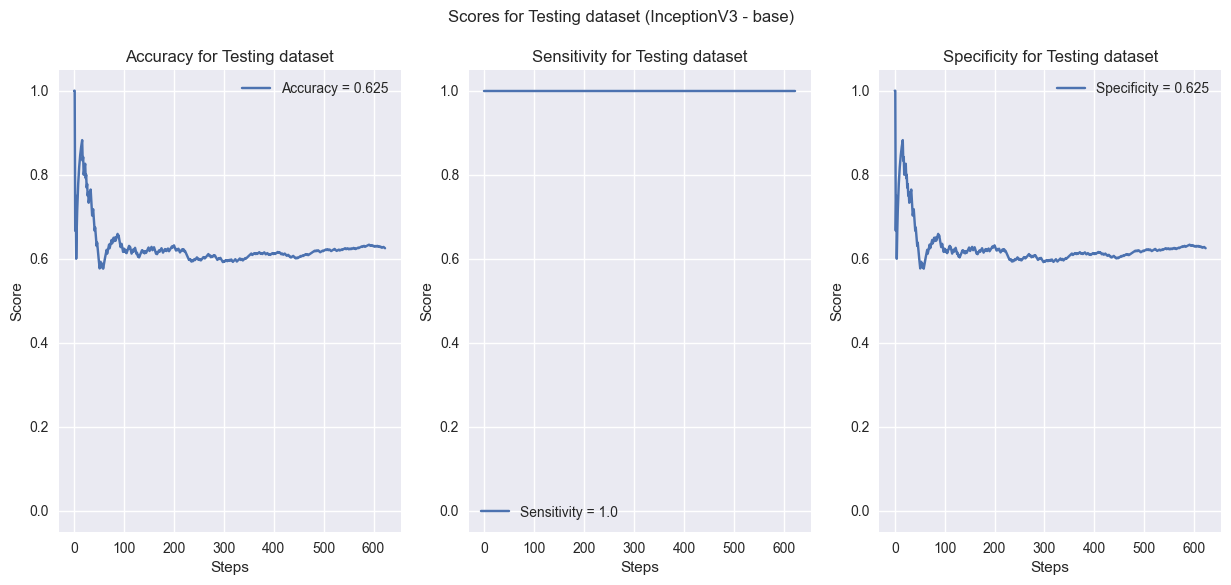

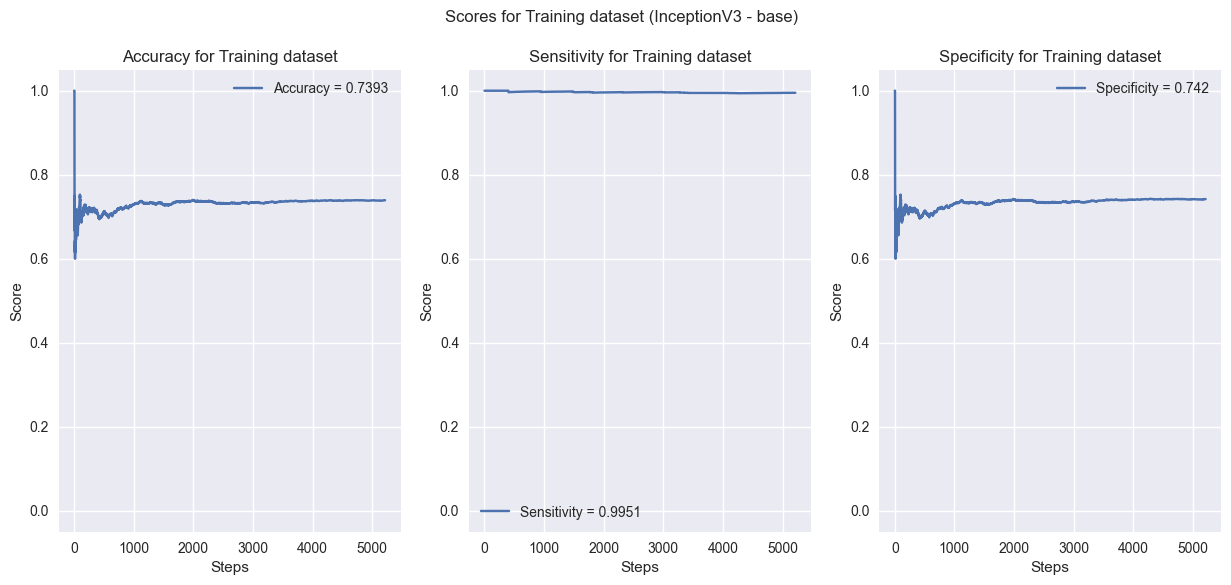

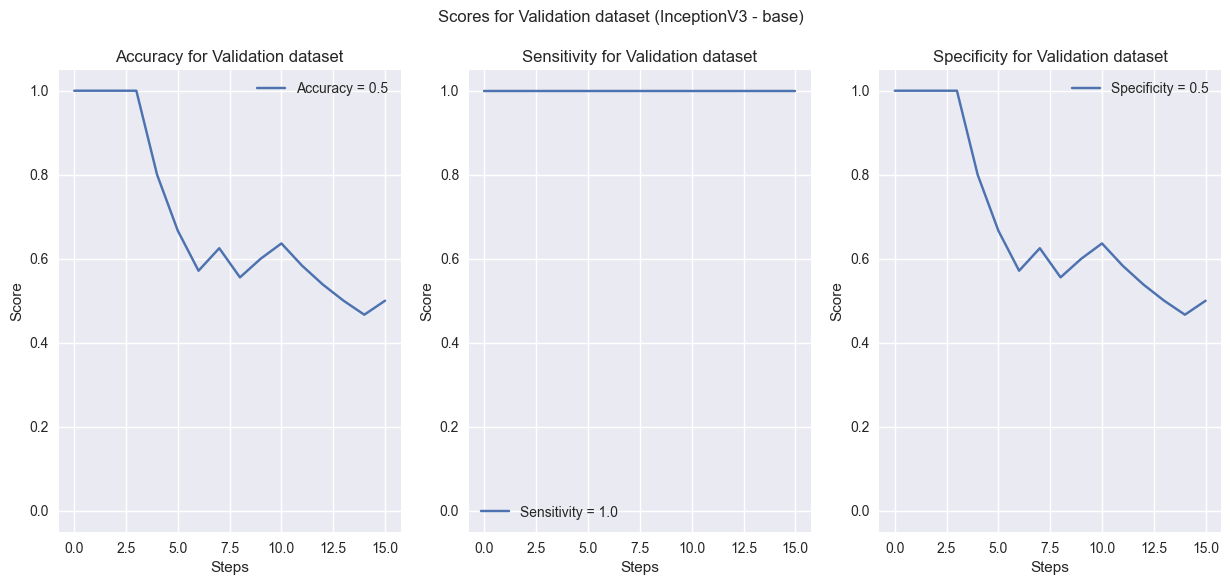

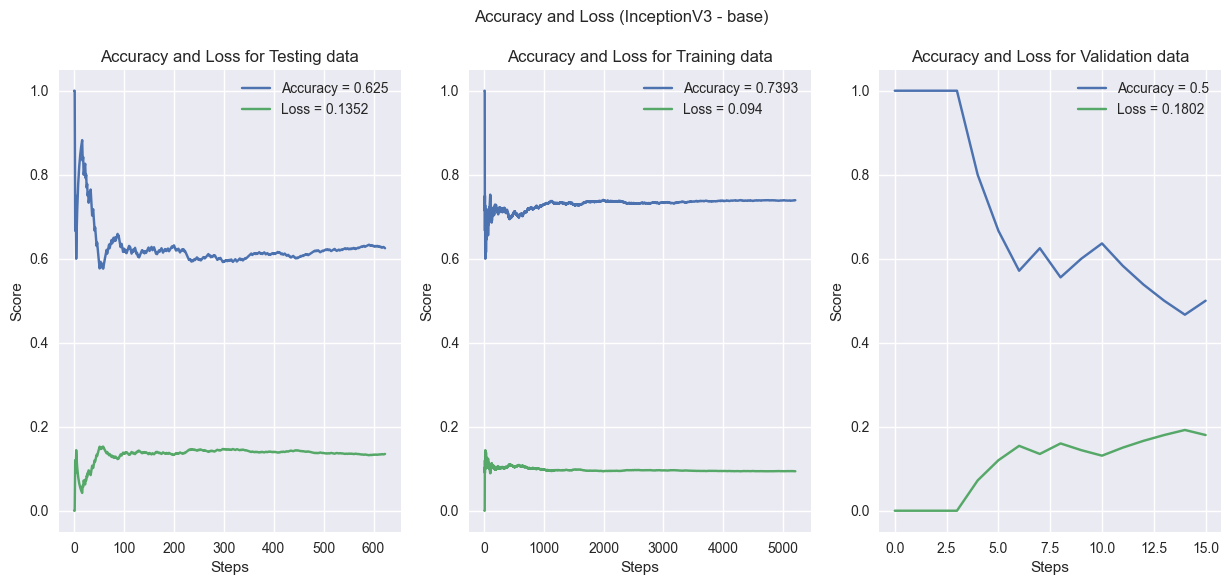

In [178]:
iv3_base_eval = plotting(iv3_base, dataloaders_iv3, 'InceptionV3 - base')

0.6091
fpr_lst
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

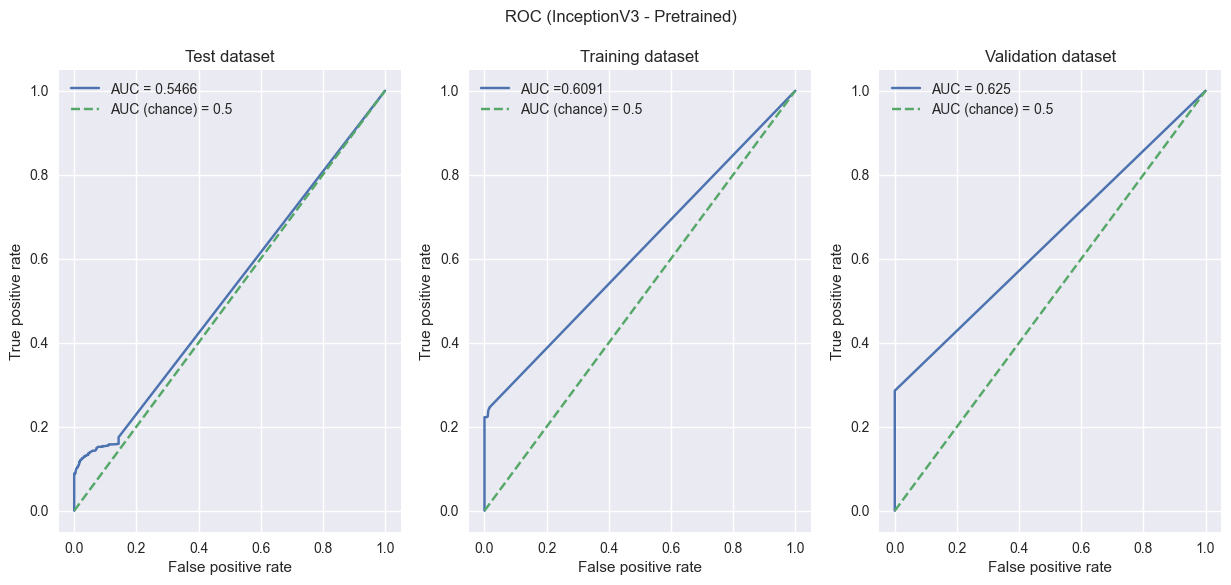

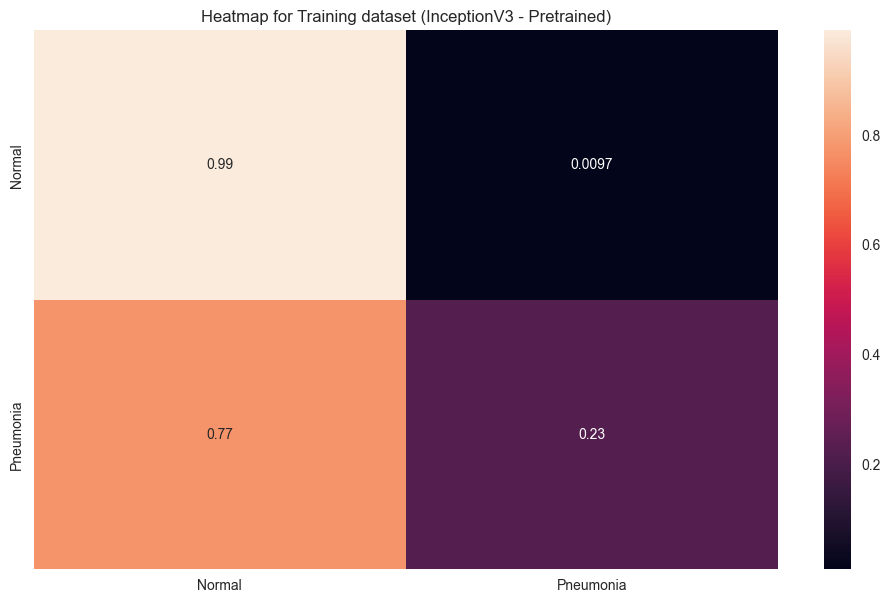

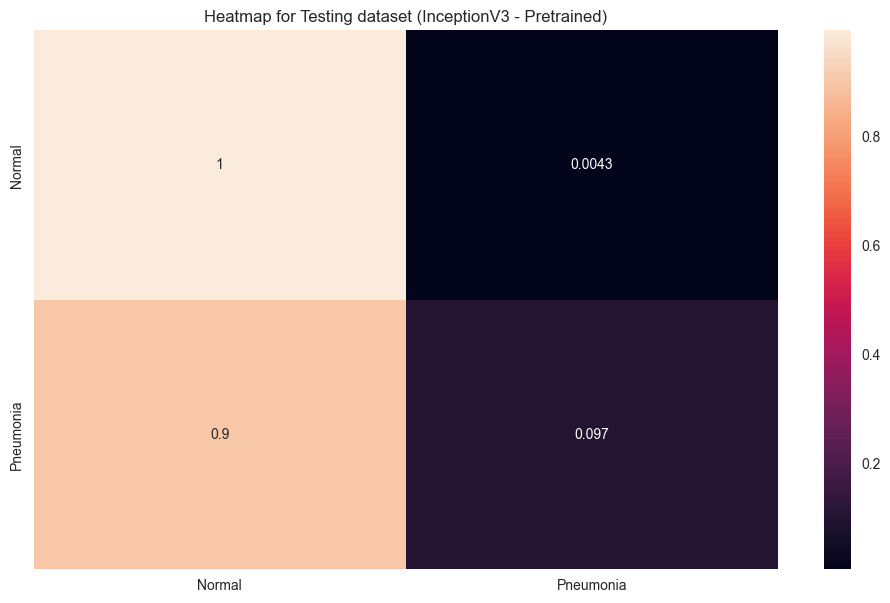

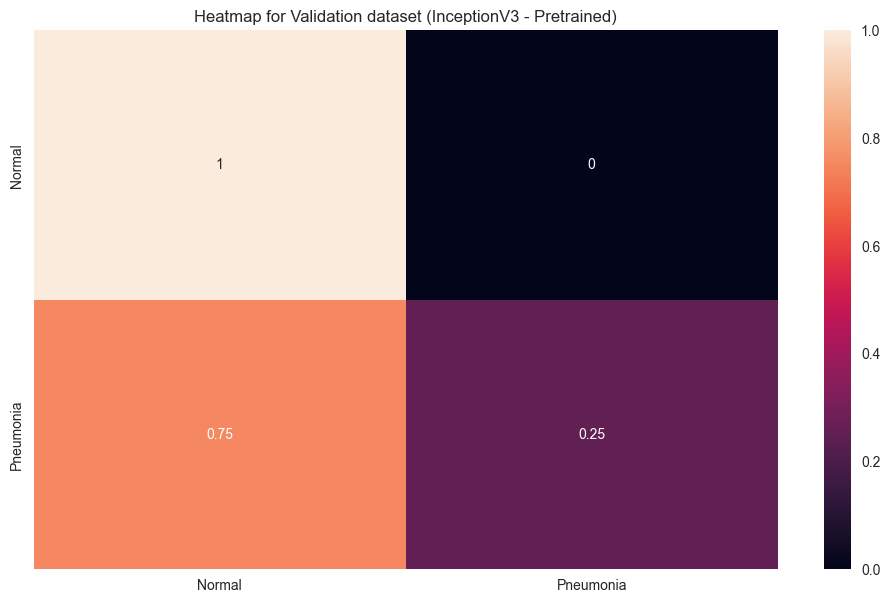

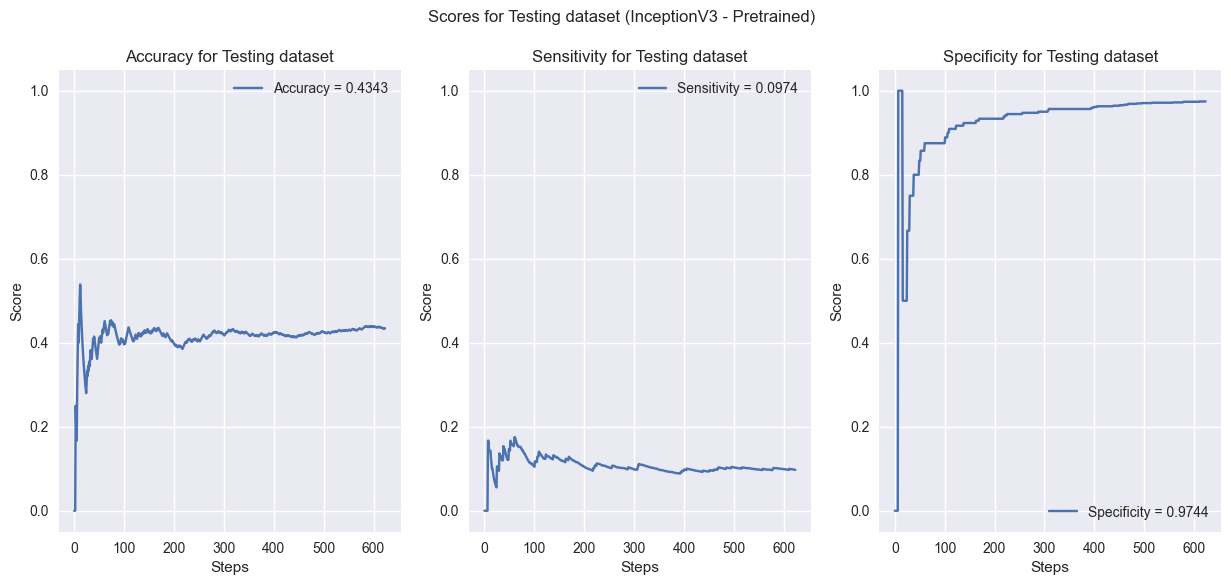

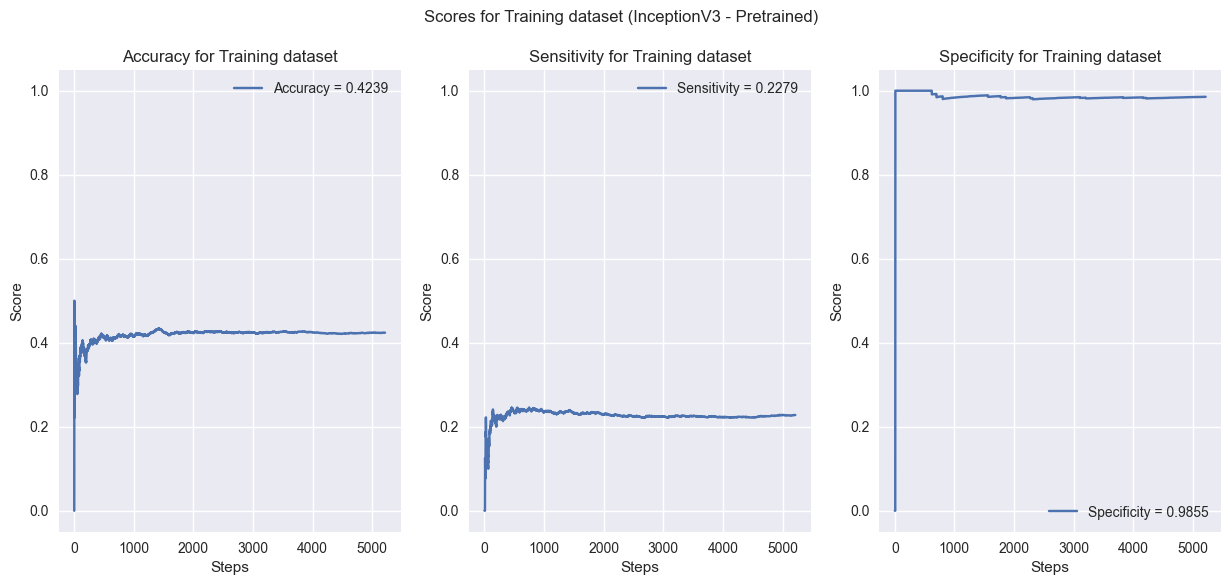

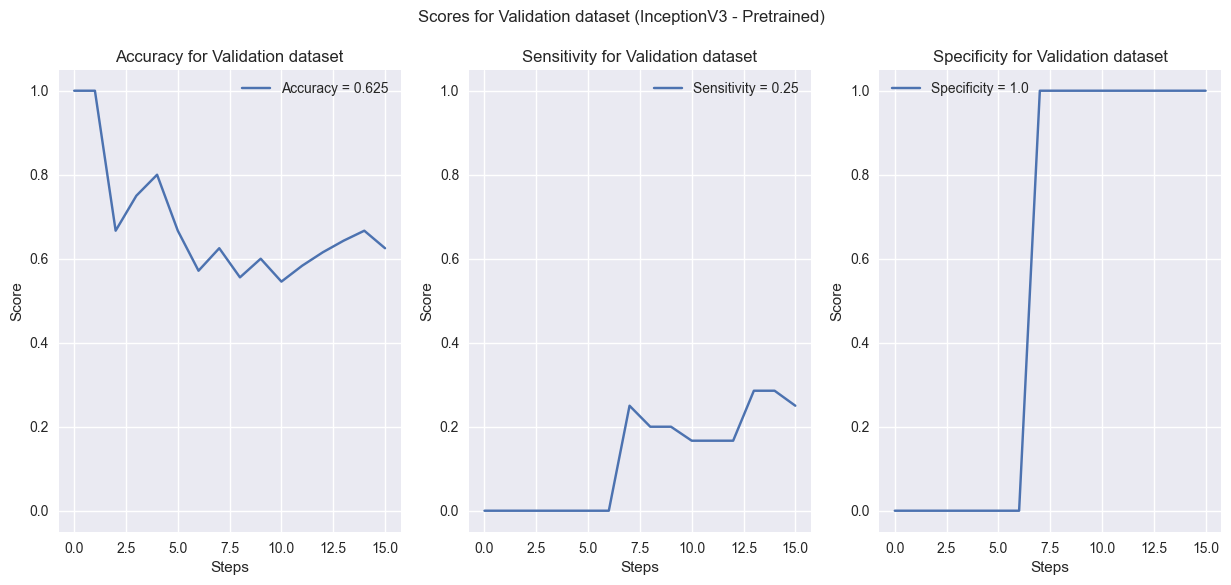

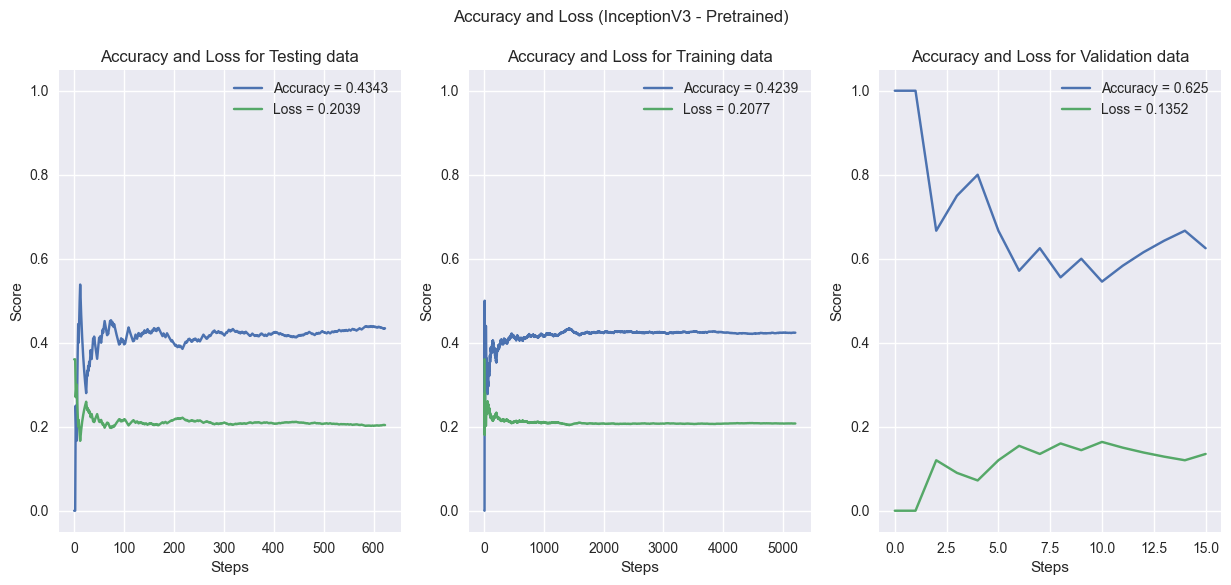

In [179]:
iv3_pretrained_eval = plotting(iv3_pretrained, dataloaders_iv3, 'InceptionV3 - Pretrained')

In [180]:
torch.cuda.empty_cache()

## EfficientnetB3

### Base model

In [45]:
# Initialising model without weights (not pretrained)
enb3_base = efficientnet_b3(weights=None)

enb3_base = enb3_base.to(device)

In [46]:
# Adam optimizer chosen as it is good for complex models
enb3_base_optimizer = optim.Adam(enb3_base.parameters(), lr=lr)

# Decay lr by a factor of 0.1 every 2 epochs
enb3_base_exp_lr_scheduler = lr_scheduler.LinearLR(enb3_base_optimizer, start_factor=1.0, end_factor=0.5, total_iters=total_iters)


In [47]:
train(enb3_base, dataloaders_enb3, enb3_base_optimizer, enb3_base_exp_lr_scheduler, epocs, dataset_sizes_enb3, 'EfficientnetB3-base')

Epoch 1 of 15
----------
Training initiated
*
Epoch 1: Adam lr 0.0500 -> 0.0482
*
Validation initiated
*
Training Loss: 0.3102 - Training accuracy: 0.6409
Validation Loss: 0.8511 - Validation accuracy: 0.5000
*
Validation loss decreased: inf -> 0.8511
Current validation accuracy: 0.5000
Saving The Model...

Epoch 2 of 15
----------
Training initiated
*
Epoch 2: Adam lr 0.0482 -> 0.0464
*
Validation initiated
*
Training Loss: 0.3004 - Training accuracy: 0.6363
Validation Loss: 0.2130 - Validation accuracy: 0.5000
*
Validation loss decreased: 0.8511 -> 0.2130
Current validation accuracy: 0.5000
Saving The Model...

Epoch 3 of 15
----------
Training initiated
*
Epoch 3: Adam lr 0.0464 -> 0.0446
*
Validation initiated
*
Training Loss: 0.3943 - Training accuracy: 0.6332
Validation Loss: 0.1987 - Validation accuracy: 0.5000
*
Validation loss decreased: 0.2130 -> 0.1987
Current validation accuracy: 0.5000
Saving The Model...

Epoch 4 of 15
----------
Training initiated
*
Epoch 4: Adam lr 0.04

In [ ]:
torch.cuda.empty_cache()

### Pretrained model

In [49]:
# Initialising model with weights (pretrained)
enb3_pretrained = efficientnet_b3(weights="DEFAULT")

enb3_pretrained = enb3_pretrained.to(device)

In [50]:
# Adam optimizer chosen as it is good for complex models
enb3_pretrained_optimizer = optim.Adam(enb3_pretrained.parameters(), lr=lr)

# Learning rate stepper 
enb3_pretrained_exp_lr_scheduler = lr_scheduler.LinearLR(enb3_pretrained_optimizer, start_factor=1.0, end_factor=0.5, total_iters=total_iters)


In [51]:
train(enb3_pretrained, dataloaders_enb3, enb3_pretrained_optimizer, enb3_pretrained_exp_lr_scheduler, epocs, dataset_sizes_enb3, 'EfficientnetB3-pretrained')

Epoch 1 of 15
----------
Training initiated
*
Epoch 1: Adam lr 0.0500 -> 0.0482
*
Validation initiated
*
Training Loss: 0.3021 - Training accuracy: 0.6551
Validation Loss: 0.1908 - Validation accuracy: 0.5000
*
Validation loss decreased: inf -> 0.1908
Current validation accuracy: 0.5000
Saving The Model...

Epoch 2 of 15
----------
Training initiated
*
Epoch 2: Adam lr 0.0482 -> 0.0464
*
Validation initiated
*
Training Loss: 0.1765 - Training accuracy: 0.6967
Validation Loss: 0.0481 - Validation accuracy: 0.5000
*
Validation loss decreased: 0.1908 -> 0.0481
Current validation accuracy: 0.5000
Saving The Model...

Epoch 3 of 15
----------
Training initiated
*
Epoch 3: Adam lr 0.0464 -> 0.0446
*
Validation initiated
*
Training Loss: 0.1652 - Training accuracy: 0.7205
Validation Loss: 0.2367 - Validation accuracy: 0.5000
*
Epoch 4 of 15
----------
Training initiated
*
Epoch 4: Adam lr 0.0446 -> 0.0429
*
Validation initiated
*
Training Loss: 0.1520 - Training accuracy: 0.7441
Validation Lo

In [52]:
torch.cuda.empty_cache()

### Evaluation

#### Load models

In [181]:
enb3_base = efficientnet_b3()
enb3_base.load_state_dict(torch.load('./models/EfficientnetB3-base.pth'))

enb3_base = enb3_base.to(device)

In [182]:
enb3_pretrained = efficientnet_b3()
enb3_pretrained.load_state_dict(torch.load('./models/EfficientnetB3-base.pth'))

enb3_pretrained = enb3_pretrained.to(device)


#### Get scores and plots

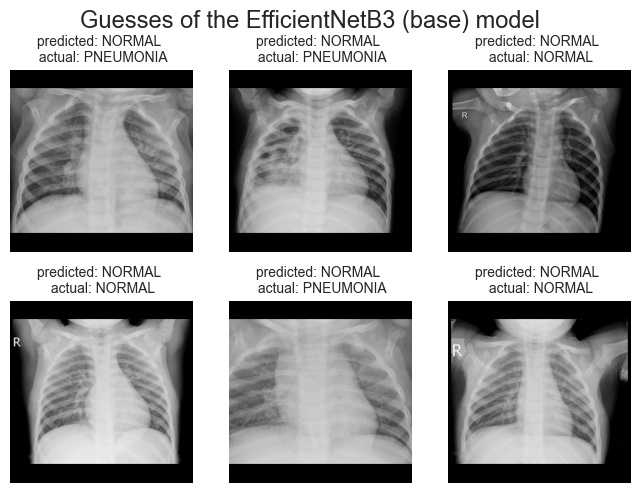

In [185]:
visualize_prediction(enb3_base, dataloaders_enb3, class_names_enb3, 'EfficientNetB3 (base)', 'EfficientNetB3-base')

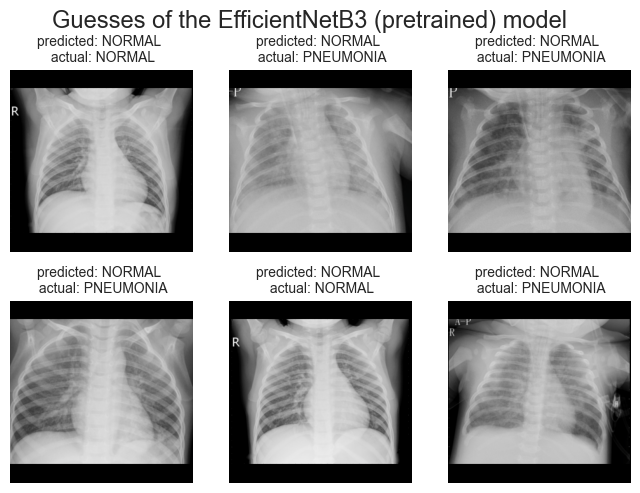

In [186]:
visualize_prediction(enb3_pretrained, dataloaders_enb3, class_names_enb3, 'EfficientNetB3 (pretrained)', 'EfficientNetB3-pretrained')

0.6353
fpr_lst
[0, 0, 0, 0, 0.06562266964951528, 1]
tpr_lst
[0, 0.25, 0.3333333333333333, 0.33625806451612905, 0.5, 1]
0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]
0.5068
fpr_lst
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004273504273504274, 0.004291845493562232, 0.004310344827586207, 0.004329004329004329, 0.004347826086956522, 0.004347826086956522, 0.004366812227074236, 0.0043859649122807015, 0.004405286343612335, 0.004405286343612335, 0.004405286343612335, 0.004405286343612335, 0.004405286343612335, 0.004405286343612335, 0.004405286343612335, 0.004424778761061947, 0.004424778761061947, 0.004424778761061947, 0.004424778761061947, 0.004424778761061947, 0.0044444444444444444, 0.0044444444444444444, 0.004464285714285714, 0.004484304932735426, 0.004484304932735426, 0.00448430493273542

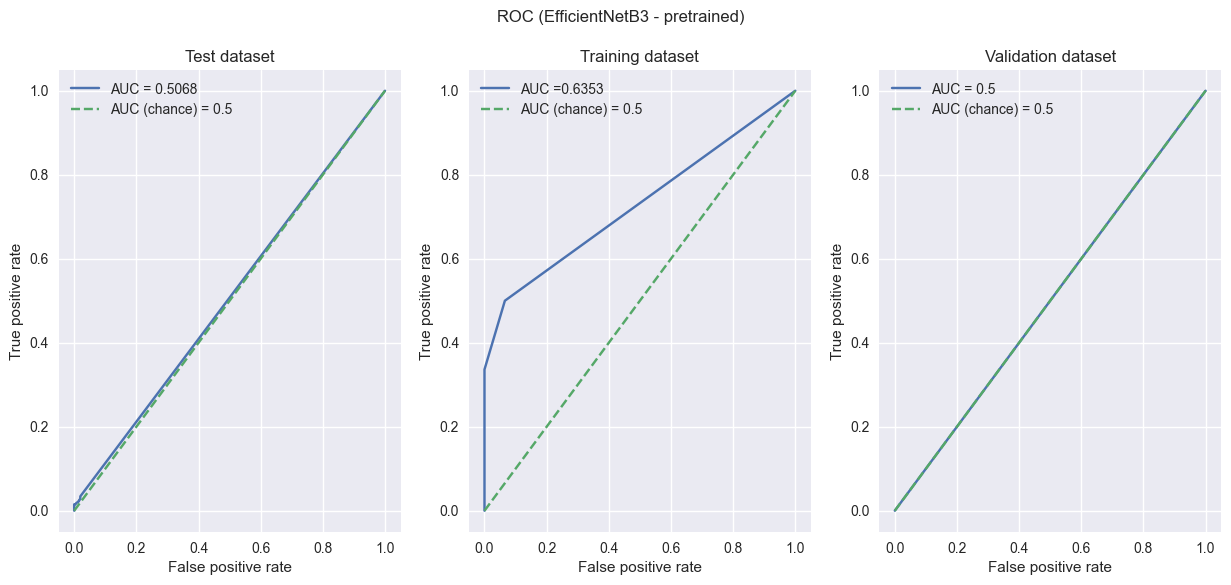

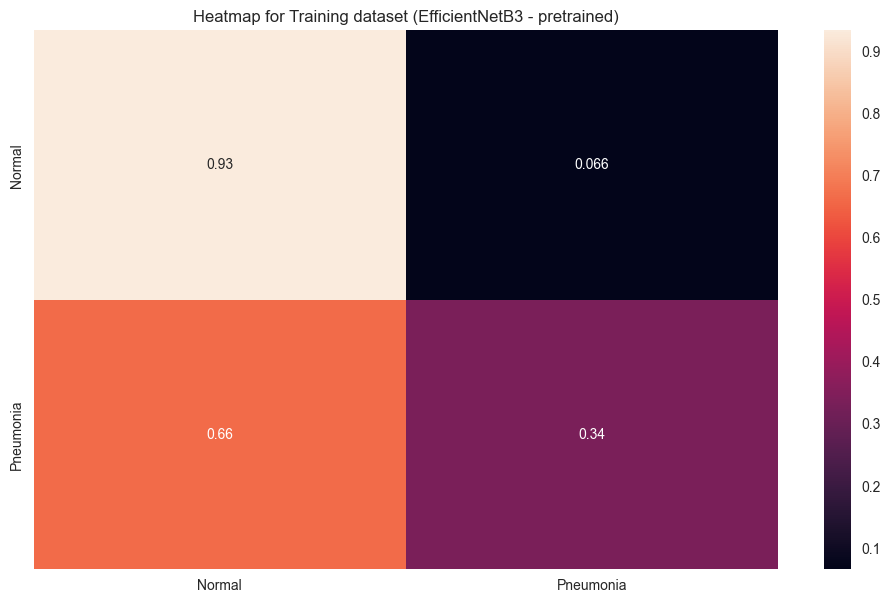

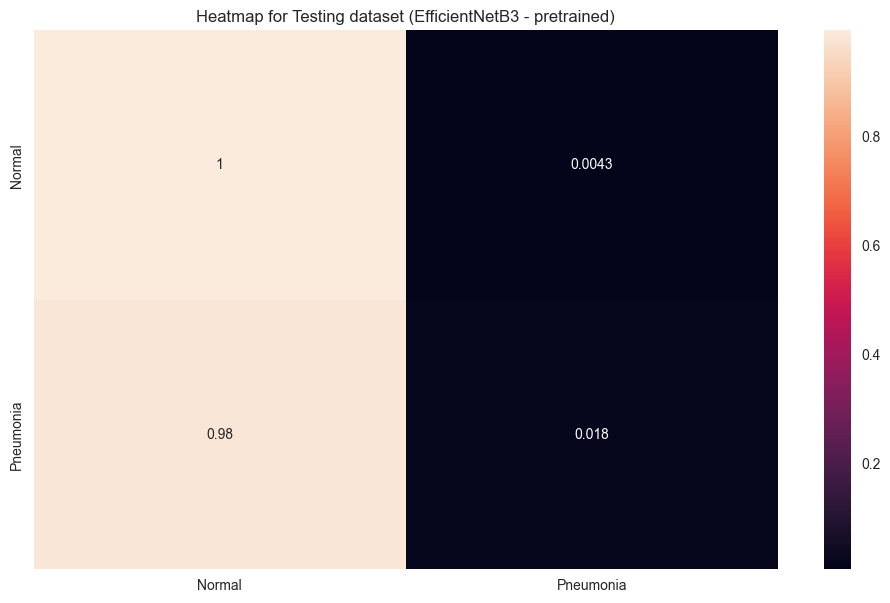

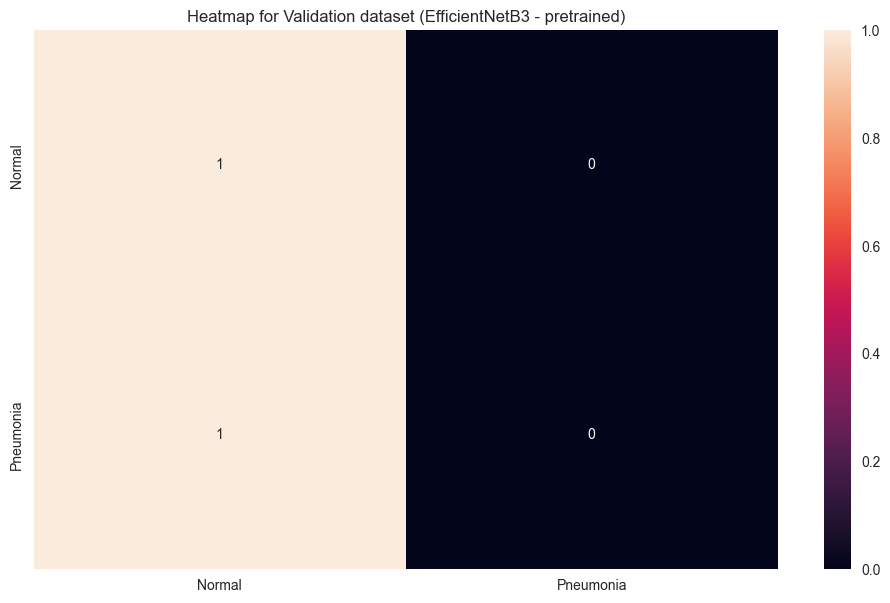

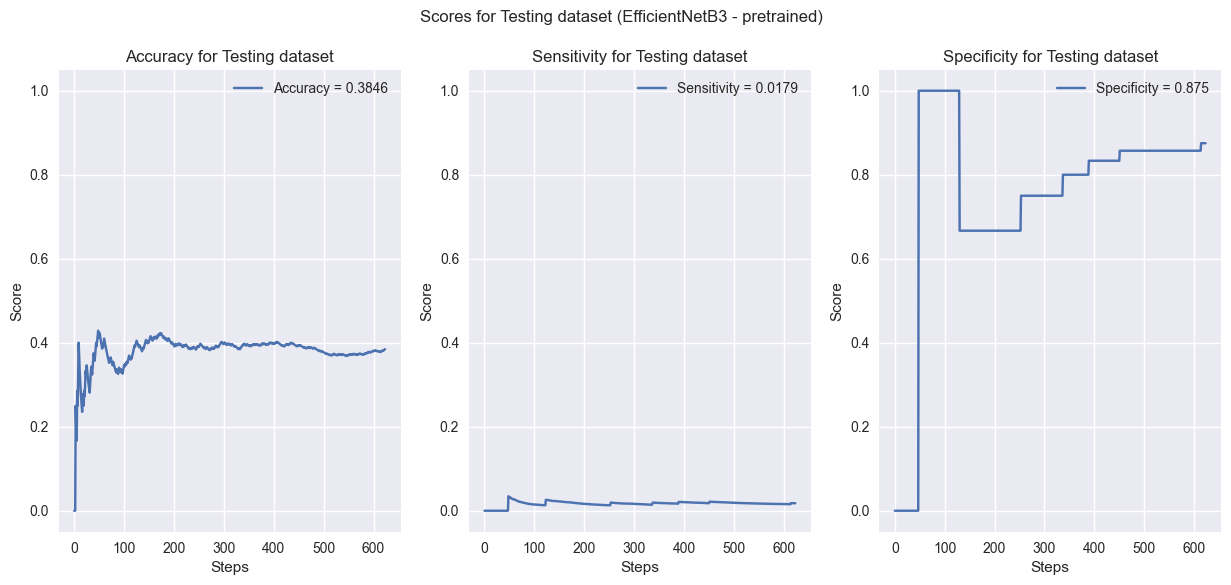

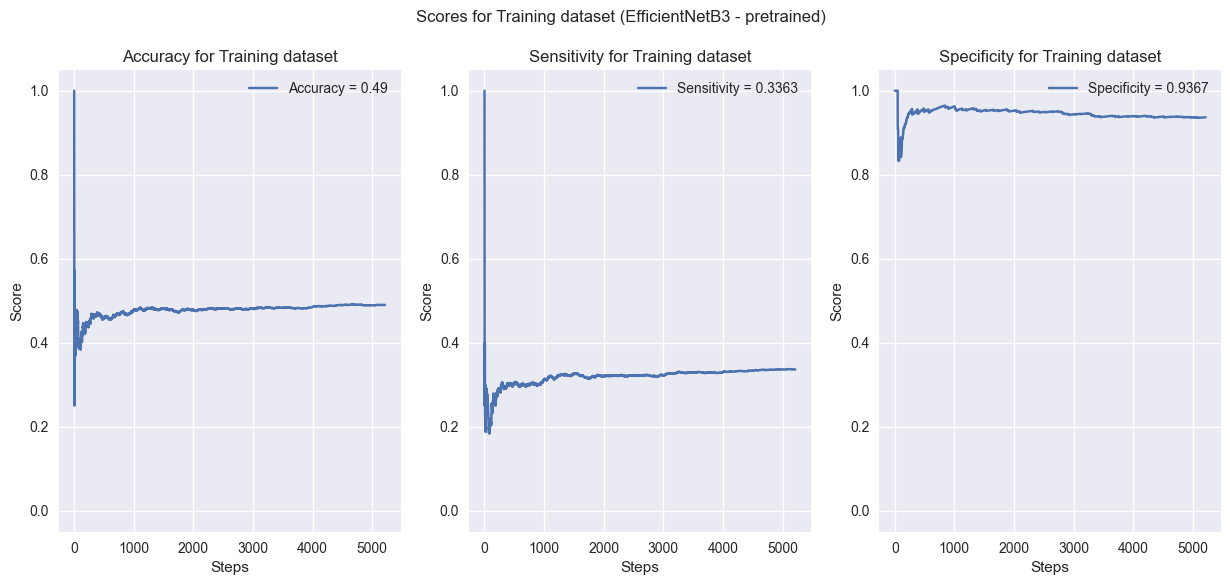

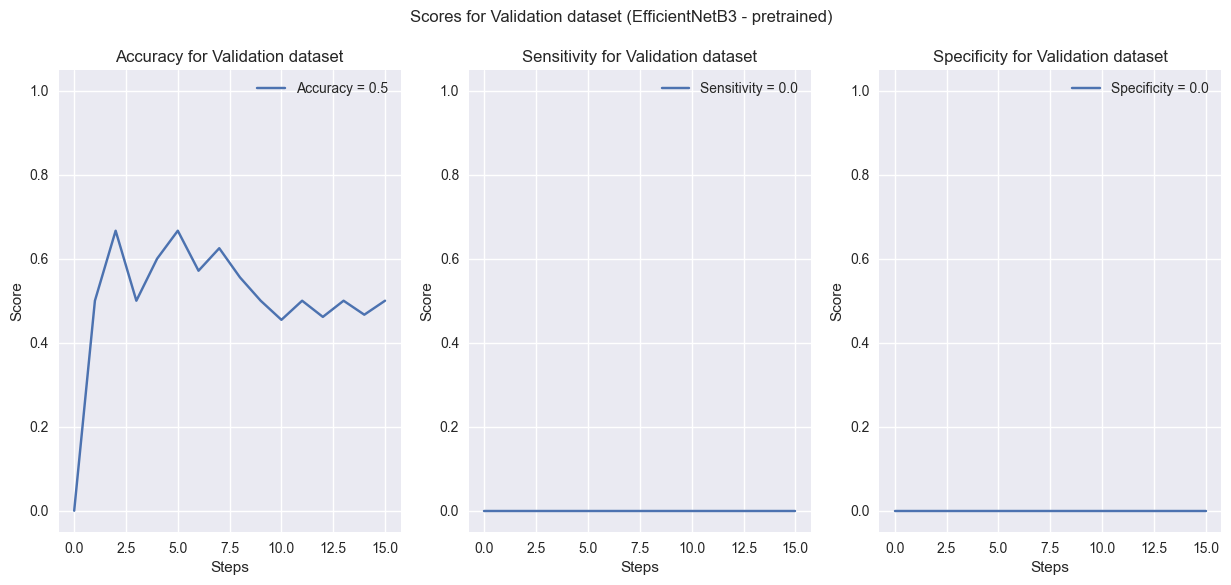

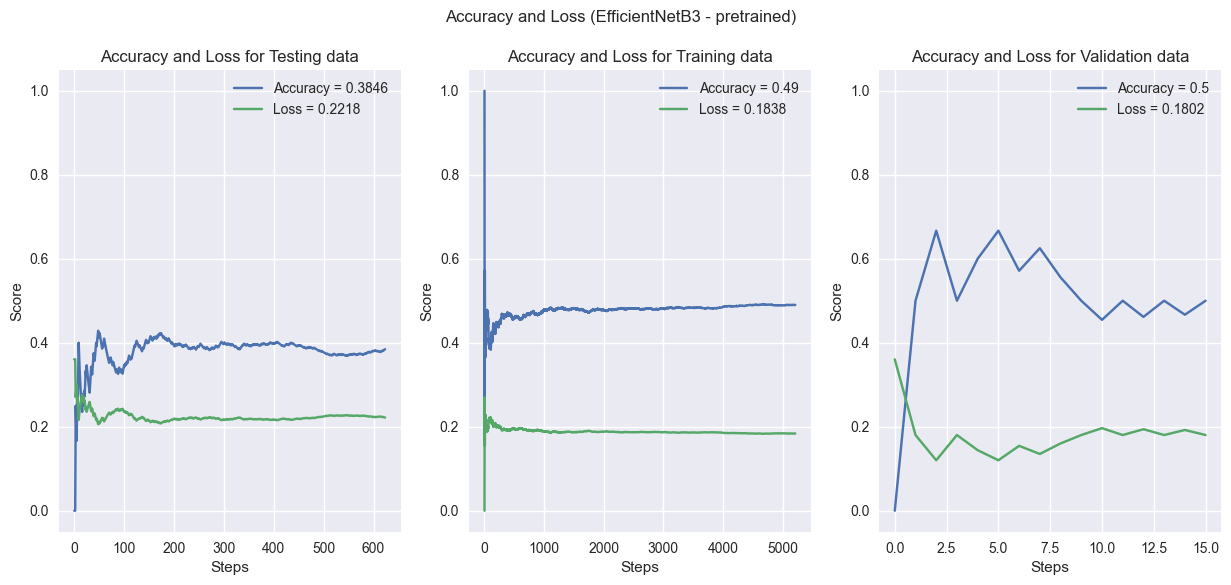

In [187]:
enb3_pretrained_eval = plotting(enb3_pretrained, dataloaders_enb3, 'EfficientNetB3 - pretrained')

0.6355
fpr_lst
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.022727272727272728, 0.022727272727272728, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.022988505747126436, 0.023255813953488372, 0.023255813953488372, 0.023255813953488372, 0.023255813953488372, 0.023255813953488372, 0.023255813953488372, 0.023255813953488372, 0.023529411764705882, 0.023529411764705882, 0.023809523809523808, 0.023809523809523808, 0.024096385542168676, 0.024096385542168676, 0.024096385542168676, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.024390243902439025, 0.02439024

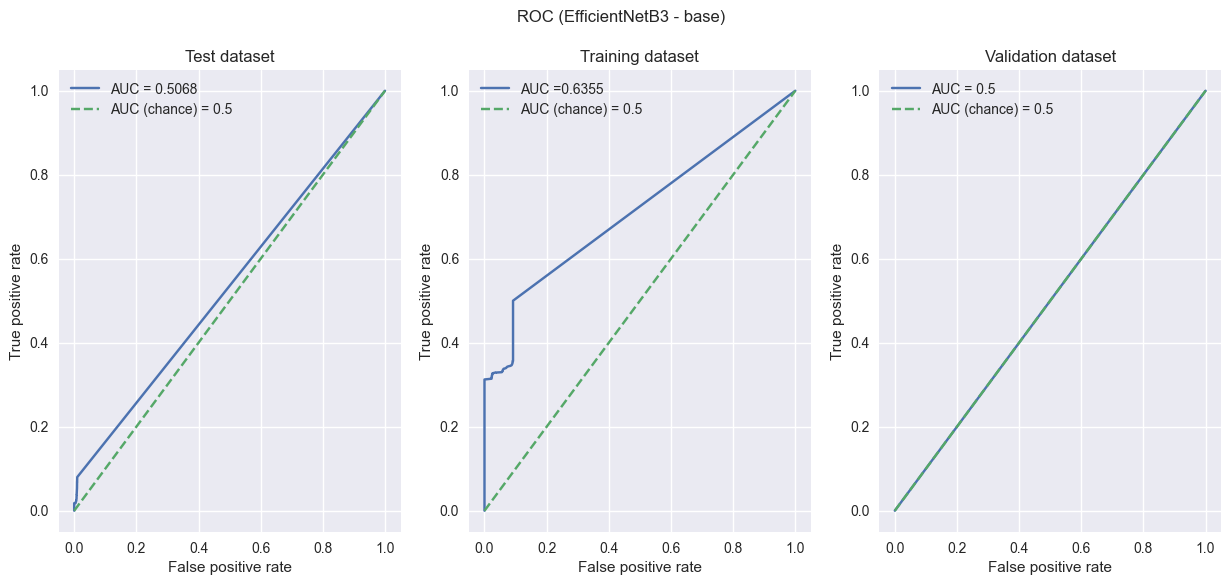

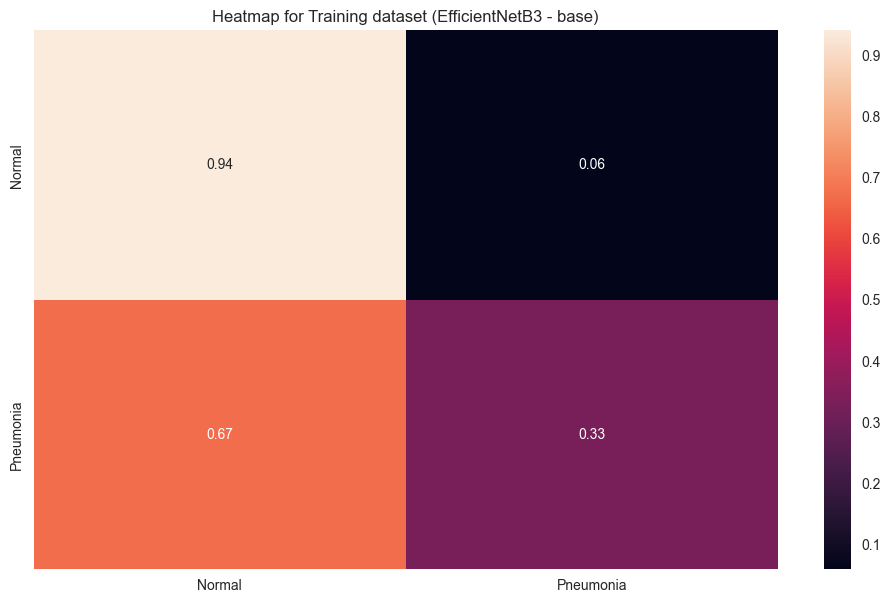

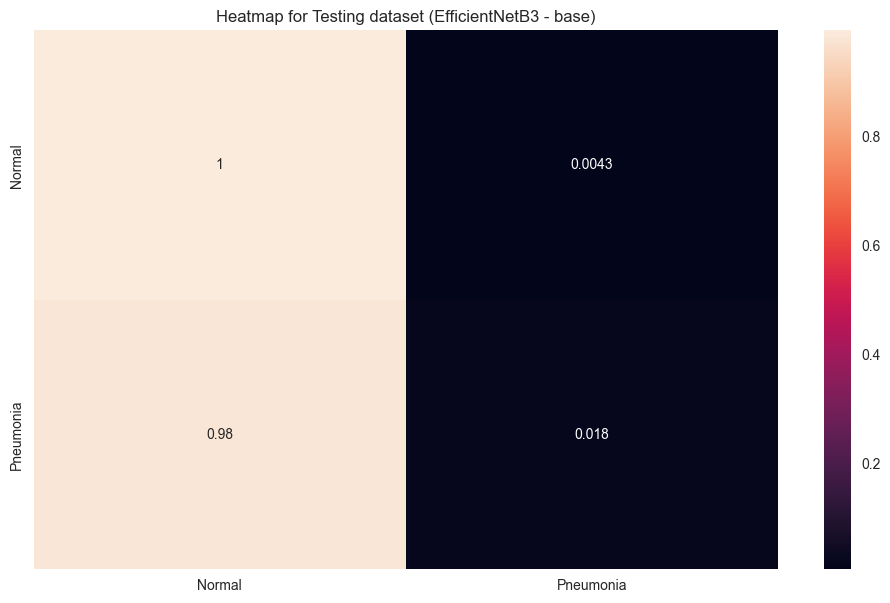

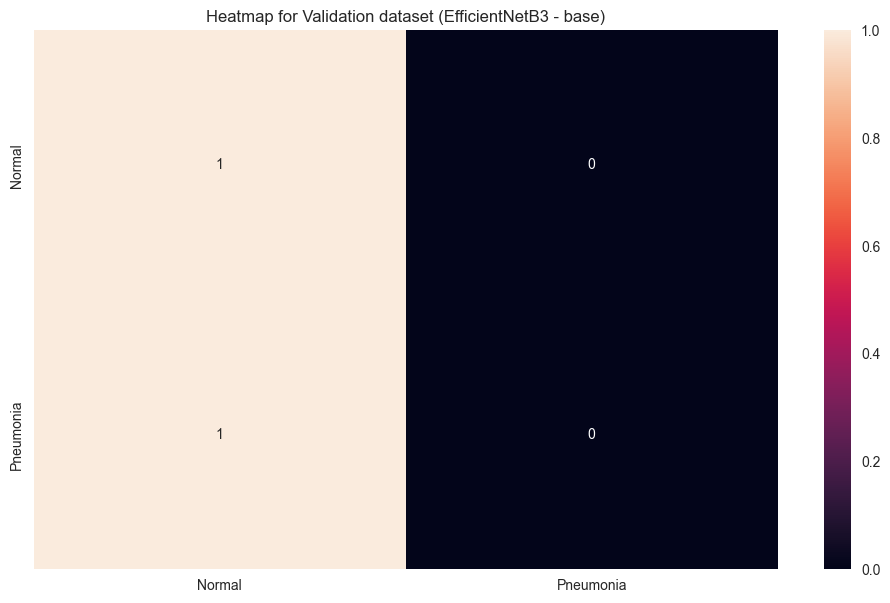

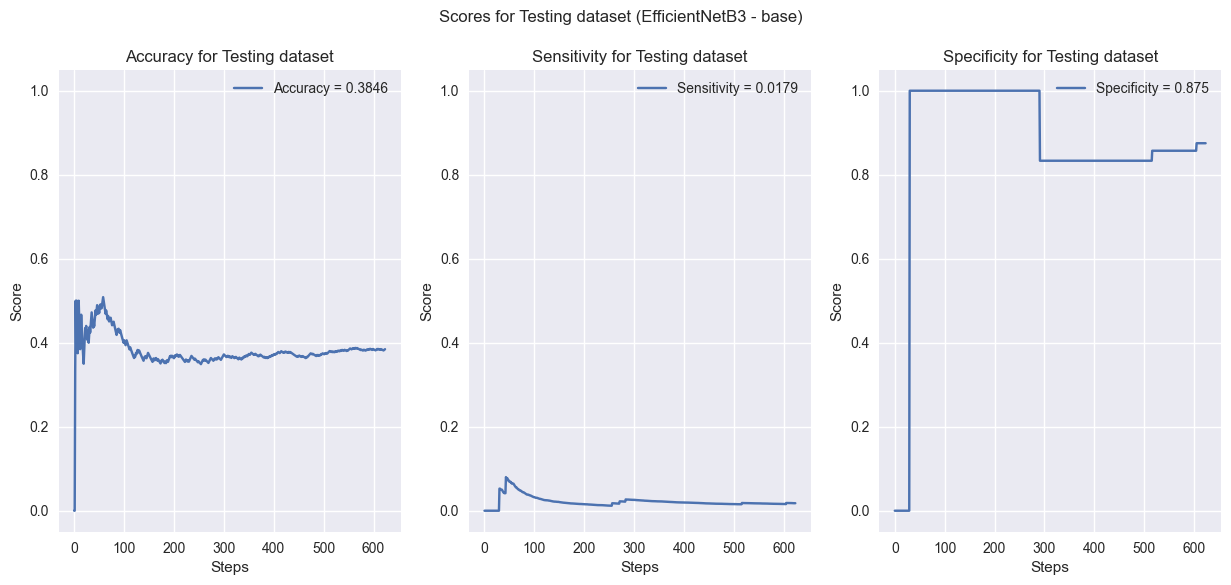

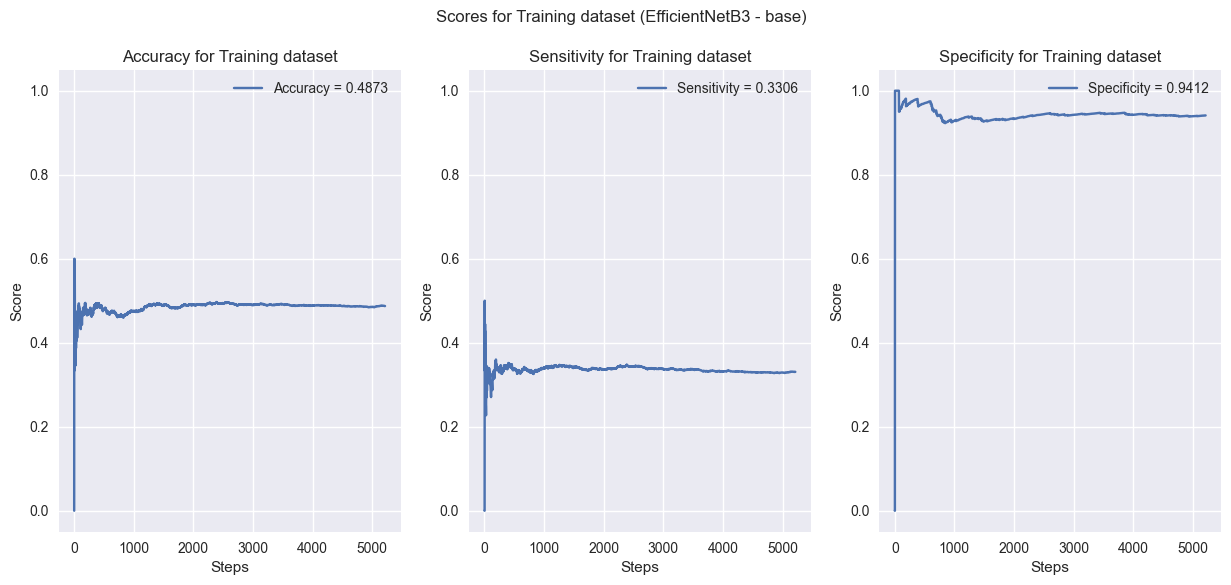

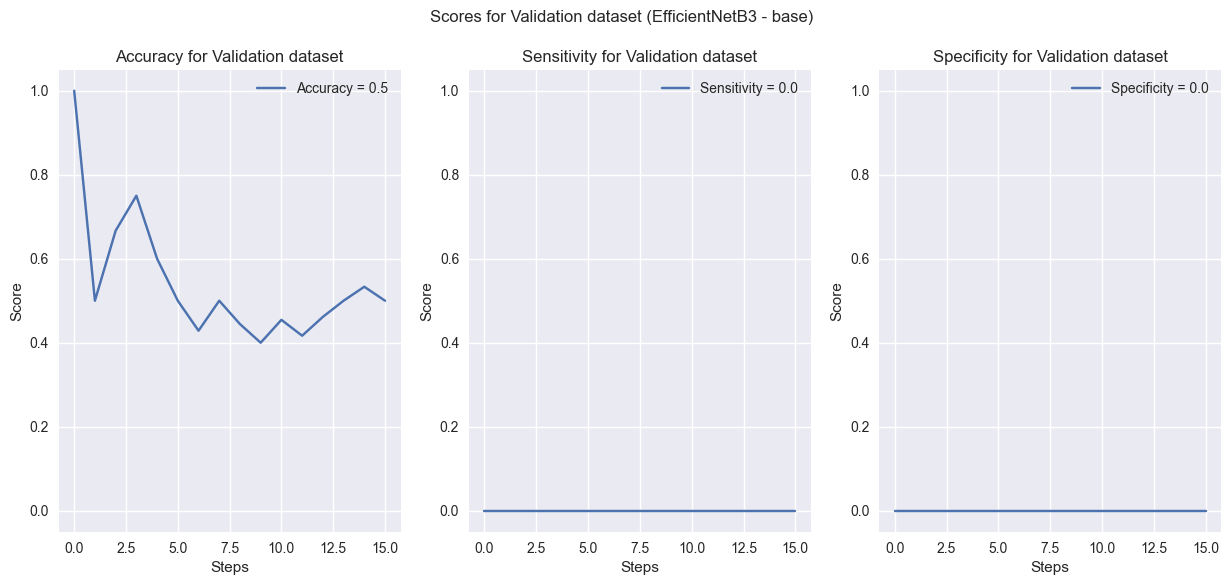

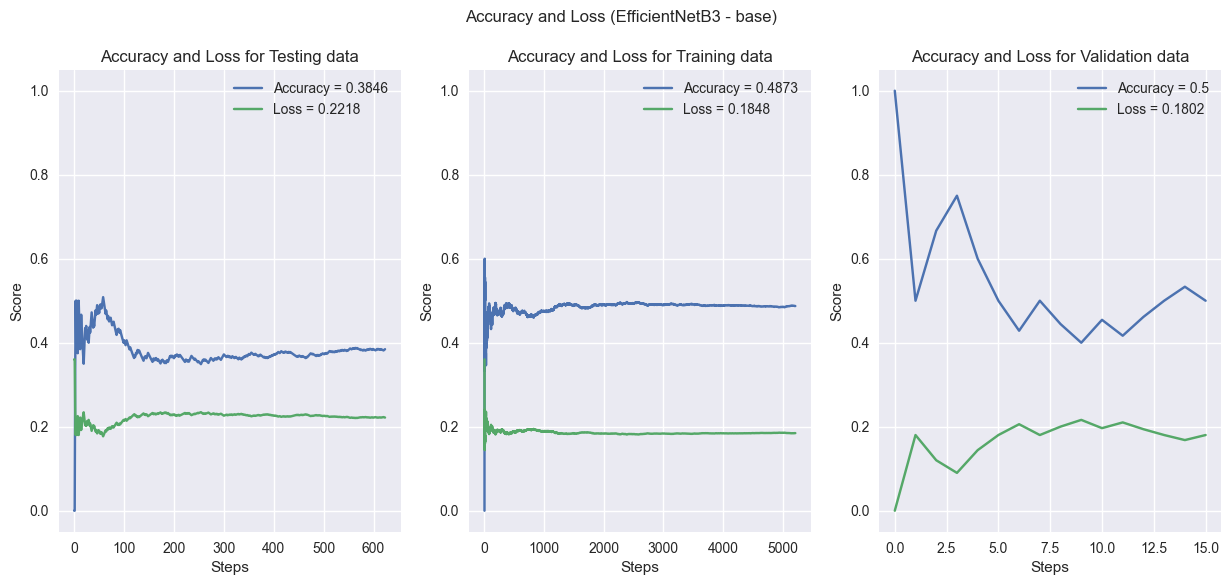

In [188]:
enb3_base_eval = plotting(enb3_base, dataloaders_enb3, 'EfficientNetB3 - base')

In [189]:
torch.cuda.empty_cache()

## DenseNet

### Base model

In [53]:
# Initialising model without weights (not pretrained)
dn_base = xrv.models.DenseNet(weights=None)

dn_base = dn_base.to(device)

In [54]:
# Adam optimizer chosen as it is good for complex models
dn_base_optimizer = optim.Adam(dn_base.parameters(), lr=lr)

# Learning rate stepper 
dn_base_exp_lr_scheduler = lr_scheduler.LinearLR(dn_base_optimizer, start_factor=1.0, end_factor=0.5, total_iters=total_iters)

In [55]:
train(dn_base, dataloaders_dn, dn_base_optimizer, dn_base_exp_lr_scheduler, epocs, dataset_sizes_dn, 'DenseNet-base')

Epoch 1 of 15
----------
Training initiated
*
Epoch 1: Adam lr 0.0500 -> 0.0482
*
Validation initiated
*
Training Loss: 0.0345 - Training accuracy: 0.7795
Validation Loss: 0.0486 - Validation accuracy: 0.5000
*
Validation loss decreased: inf -> 0.0486
Current validation accuracy: 0.5000
Saving The Model...

Epoch 2 of 15
----------
Training initiated
*
Epoch 2: Adam lr 0.0482 -> 0.0464
*
Validation initiated
*
Training Loss: 0.0270 - Training accuracy: 0.8229
Validation Loss: 0.1104 - Validation accuracy: 0.6875
*
Epoch 3 of 15
----------
Training initiated
*
Epoch 3: Adam lr 0.0464 -> 0.0446
*
Validation initiated
*
Training Loss: 0.0255 - Training accuracy: 0.8414
Validation Loss: 0.1564 - Validation accuracy: 0.6250
*
Epoch 4 of 15
----------
Training initiated
*
Epoch 4: Adam lr 0.0446 -> 0.0429
*
Validation initiated
*
Training Loss: 0.0227 - Training accuracy: 0.8485
Validation Loss: 0.0138 - Validation accuracy: 0.7500
*
Validation loss decreased: 0.0486 -> 0.0138
Current valida

In [56]:
torch.cuda.empty_cache()

### Pretrained model

In [219]:
# Initialising model with weights (pretrained)
dn_pretrained = xrv.models.DenseNet(weights="densenet121-res224-rsna", apply_sigmoid=True)

dn_pretrained = dn_pretrained.to(device)

In [220]:
# Adam optimizer chosen as it is good for complex models
dn_pretrained_optimizer = optim.Adam(dn_pretrained.parameters(), lr=lr)

# Learning rate stepper 
dn_pretrained_exp_lr_scheduler = lr_scheduler.LinearLR(dn_pretrained_optimizer, start_factor=1.0, end_factor=0.5, total_iters=total_iters)


In [221]:
train(dn_pretrained, dataloaders_dn, dn_pretrained_optimizer, dn_pretrained_exp_lr_scheduler, epocs, dataset_sizes_dn, 'DenseNet-pretrained')

Epoch 1 of 15
----------
Training initiated
*
Epoch 1: Adam lr 0.0500 -> 0.0482
*
Validation initiated
*
Training Loss: 0.1946 - Training accuracy: 0.0000
Validation Loss: 0.1823 - Validation accuracy: 0.0000
*
Validation loss decreased: inf -> 0.1823
Current validation accuracy: 0.0000
Saving The Model...

Epoch 2 of 15
----------
Training initiated
*
Epoch 2: Adam lr 0.0482 -> 0.0464
*
Validation initiated
*
Training Loss: 0.1946 - Training accuracy: 0.0000
Validation Loss: 0.1823 - Validation accuracy: 0.0000
*
Epoch 3 of 15
----------
Training initiated
*
Epoch 3: Adam lr 0.0464 -> 0.0446
*
Validation initiated
*
Training Loss: 0.1946 - Training accuracy: 0.0000
Validation Loss: 0.1823 - Validation accuracy: 0.0000
*
Epoch 4 of 15
----------
Training initiated
*
Epoch 4: Adam lr 0.0446 -> 0.0429
*
Validation initiated
*
Training Loss: 0.1946 - Training accuracy: 0.0000
Validation Loss: 0.1823 - Validation accuracy: 0.0000
*
Epoch 5 of 15
----------
Training initiated
*
Epoch 5: Ada

In [222]:
torch.cuda.empty_cache()

### Evaluation

#### Load models

In [190]:
dn_base = xrv.models.DenseNet()
dn_base.load_state_dict(torch.load('./models/DenseNet-base.pth'))

dn_base = dn_base.to(device)

In [223]:
dn_pretrained = xrv.models.DenseNet(weights="densenet121-res224-rsna")
dn_pretrained.load_state_dict(torch.load('./models/DenseNet-pretrained.pth'))

dn_pretrained = dn_pretrained.to(device)

#### Get scores and plots

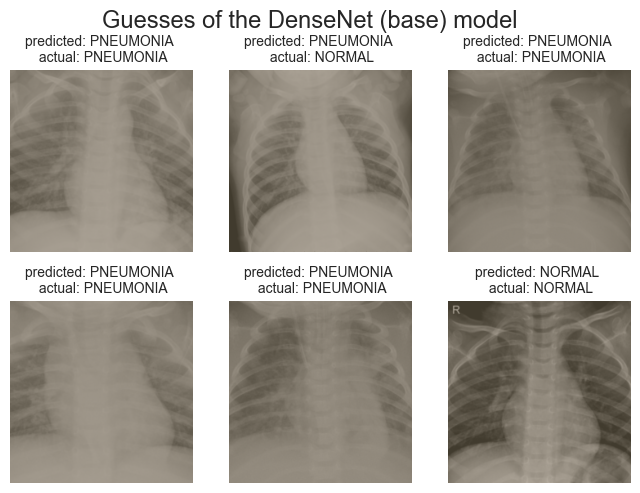

In [194]:
visualize_prediction(dn_base, dataloaders_dn, class_names_dn, 'DenseNet (base)', 'DenseNet-base')

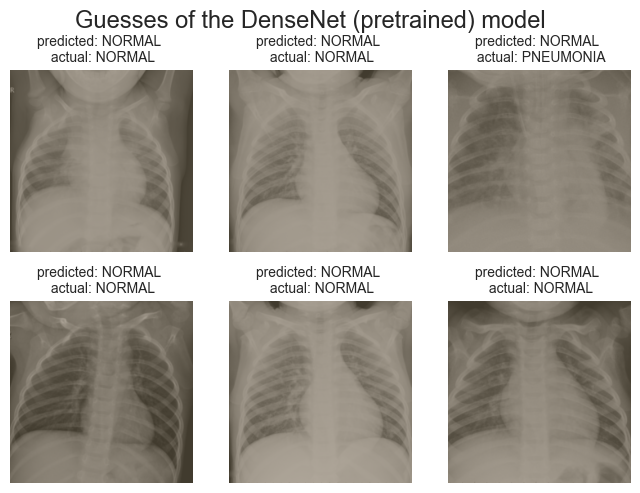

In [225]:
visualize_prediction(dn_pretrained, dataloaders_dn, class_names_dn, 'DenseNet (pretrained)', 'DenseNet-pretrained')

0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]
0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]
0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]


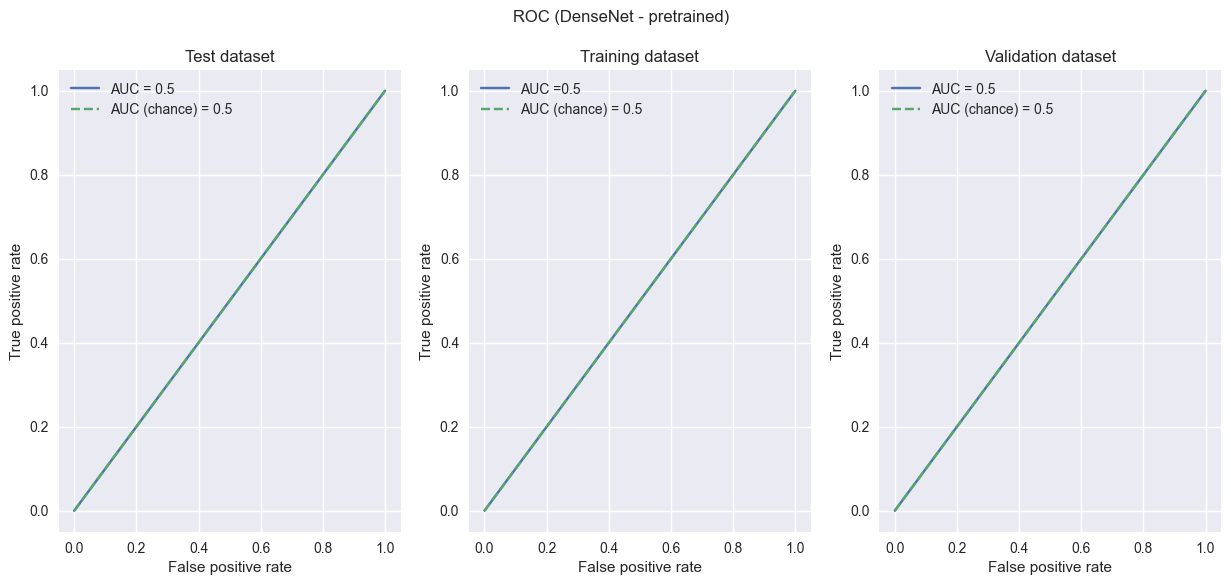

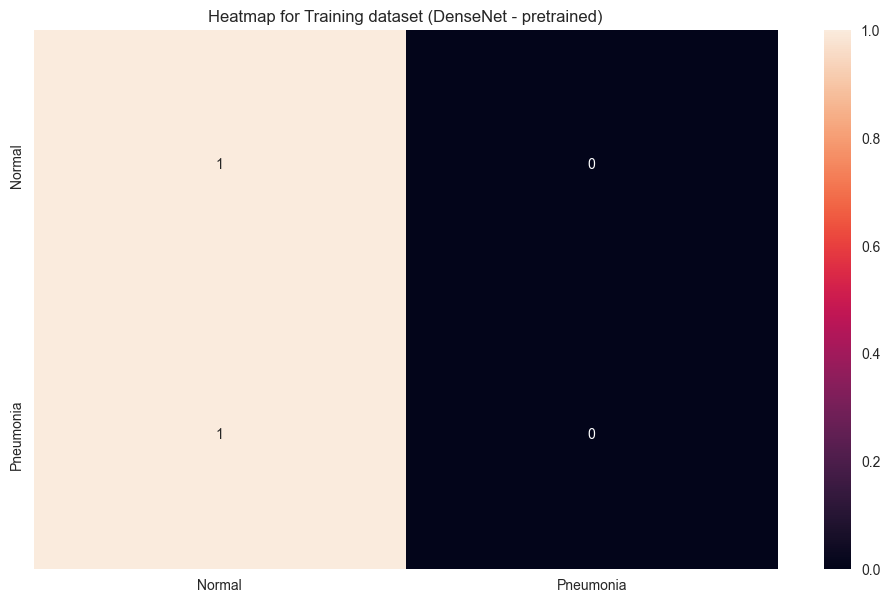

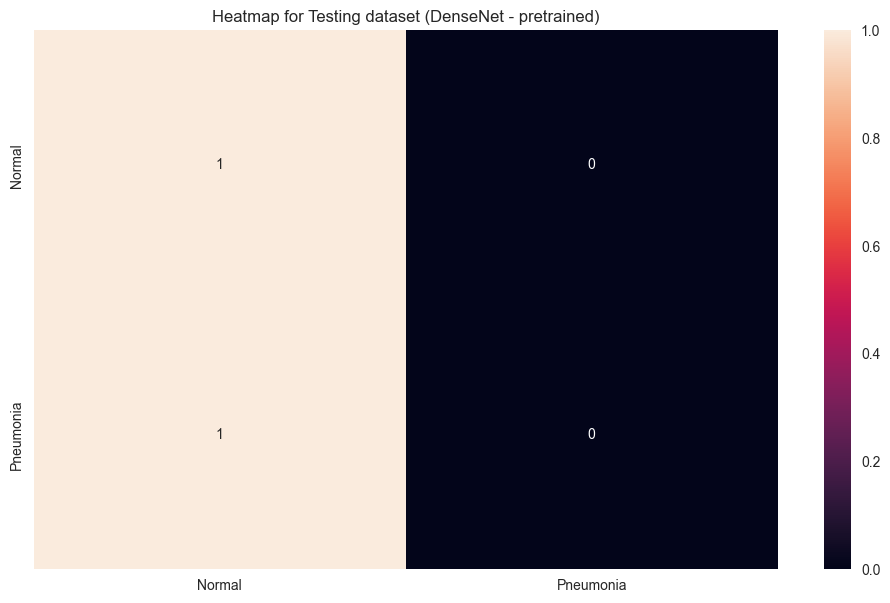

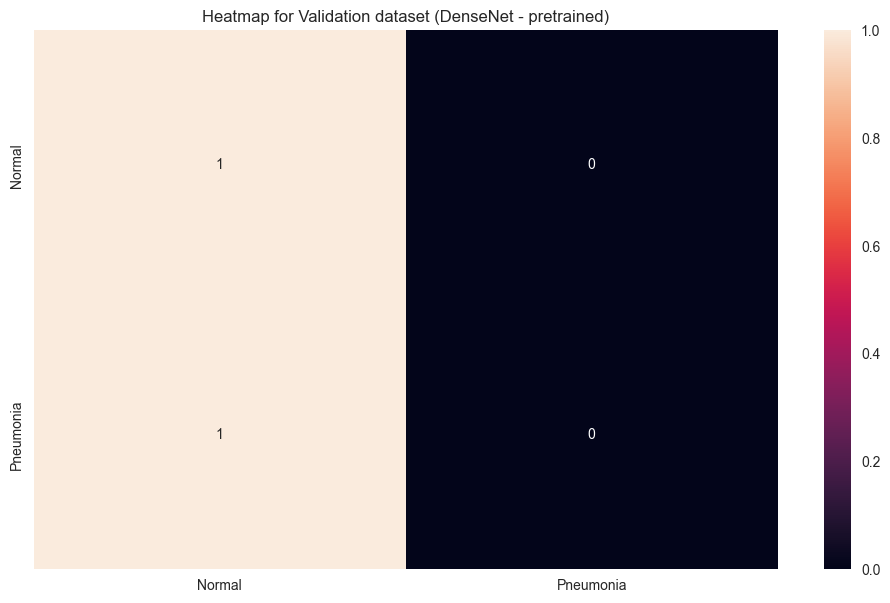

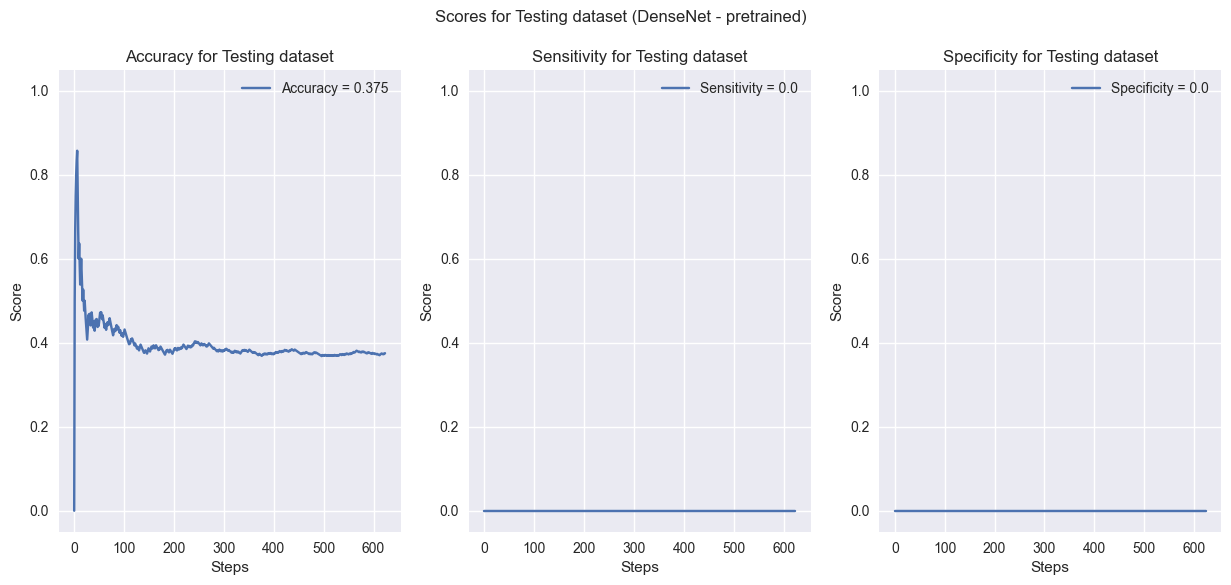

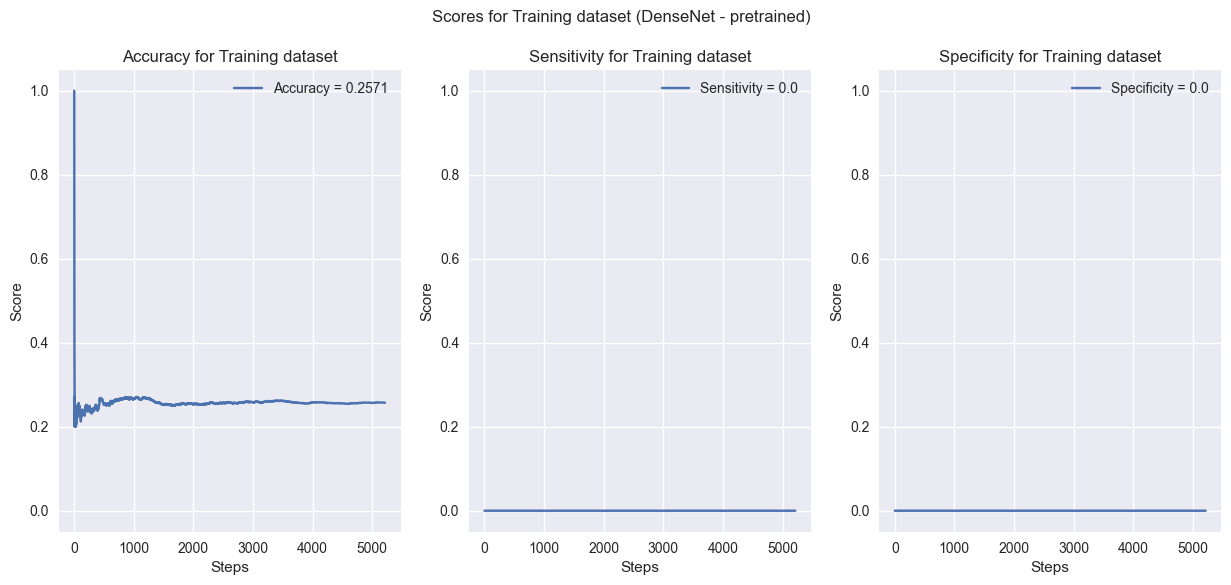

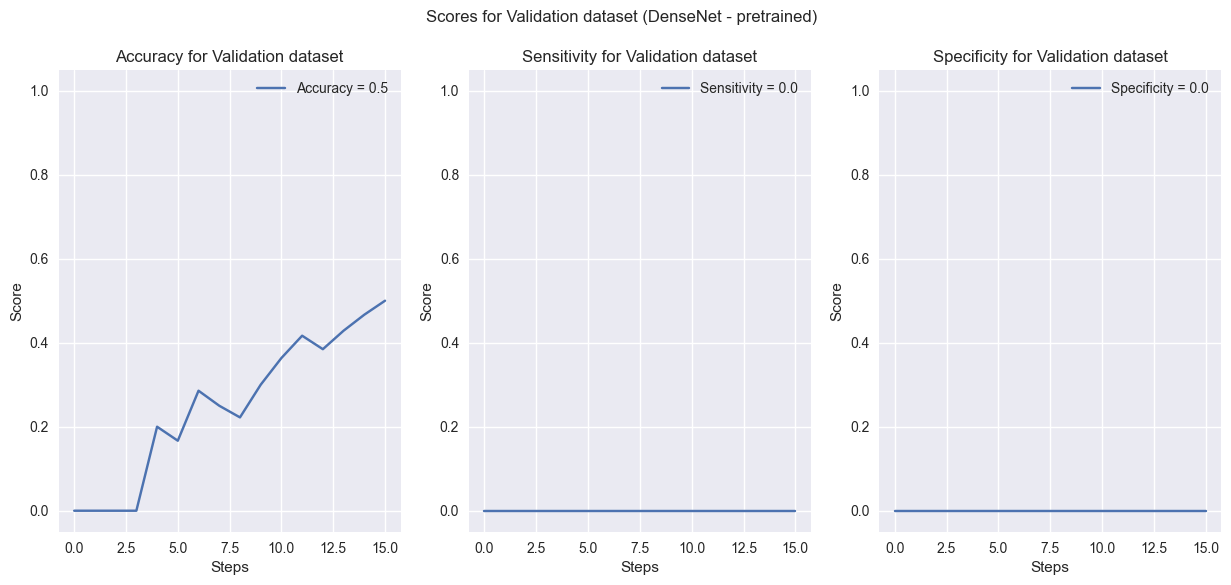

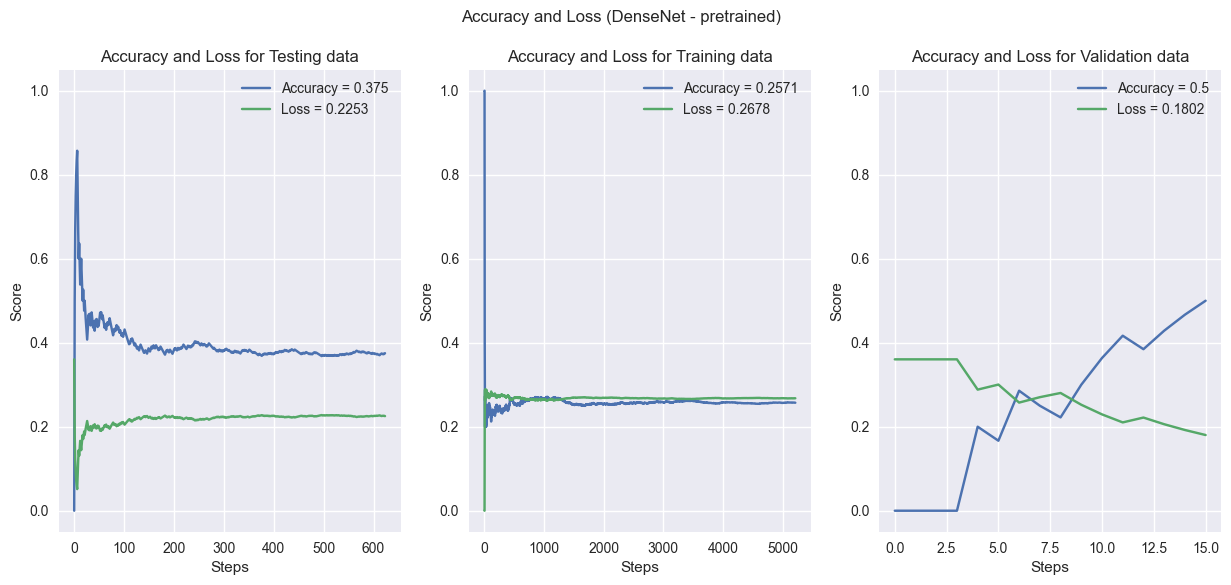

In [226]:
dn_pretrained_eval = plotting(dn_pretrained, dataloaders_dn, 'DenseNet - pretrained')

0.847
fpr_lst
[0, 0.2244593586875466, 1]
tpr_lst
[0, 0.9184516129032259, 1]
0.625
fpr_lst
[0, 0.625, 0.6666666666666666, 0.6666666666666666, 1]
tpr_lst
[0, nan, nan, 0.875, 1]
0.8291
fpr_lst
[0, 0, 0.21367521367521367, 1]
tpr_lst
[0, nan, 0.8717948717948718, 1]


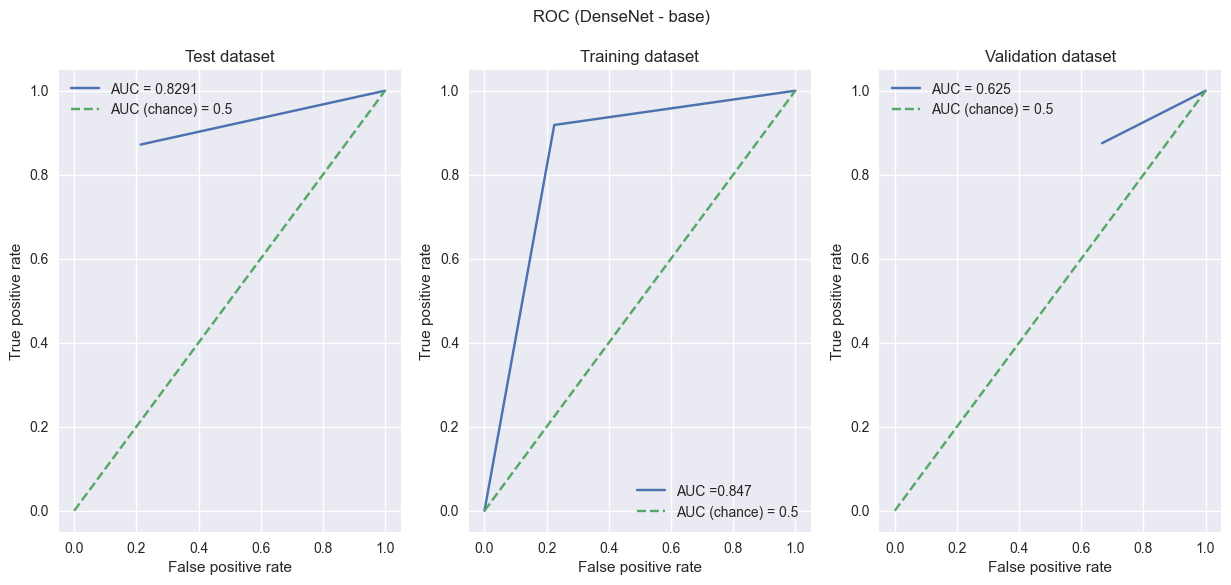

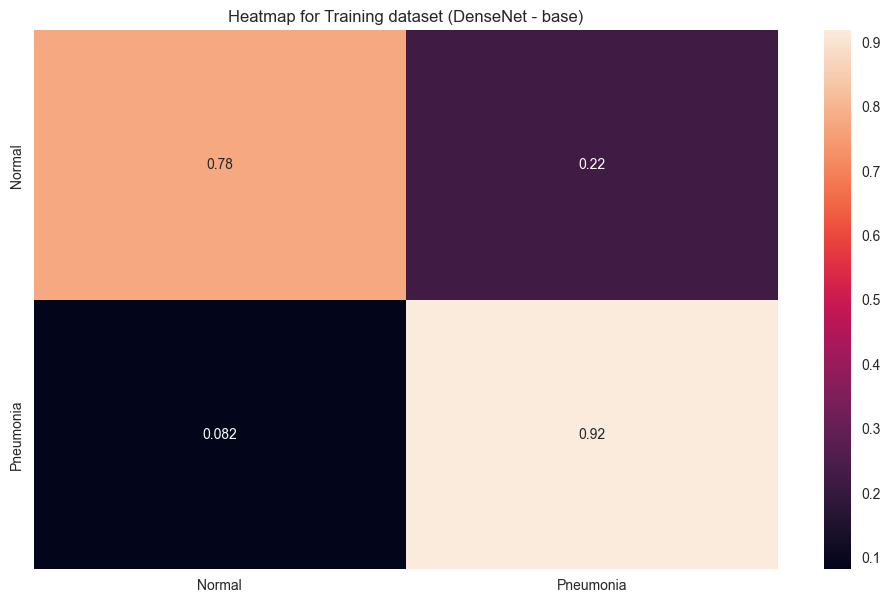

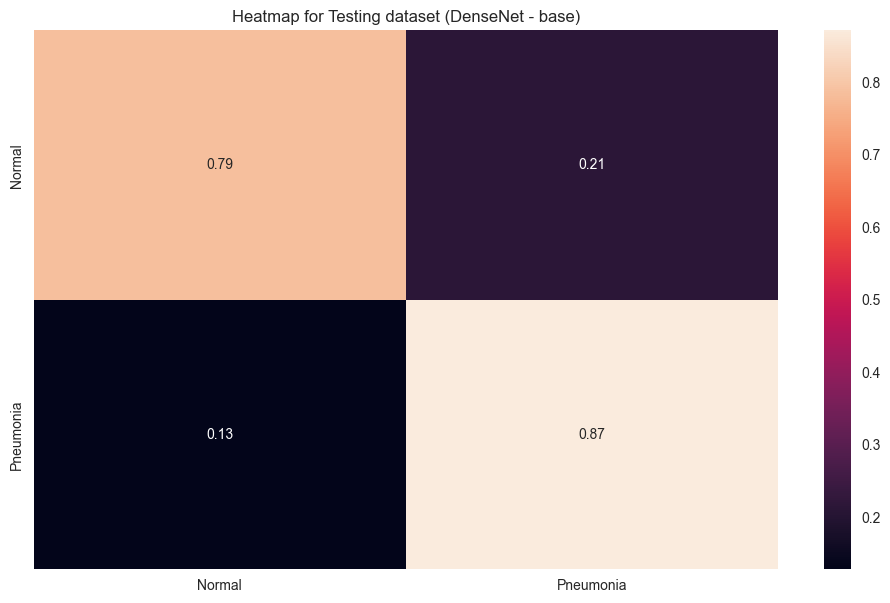

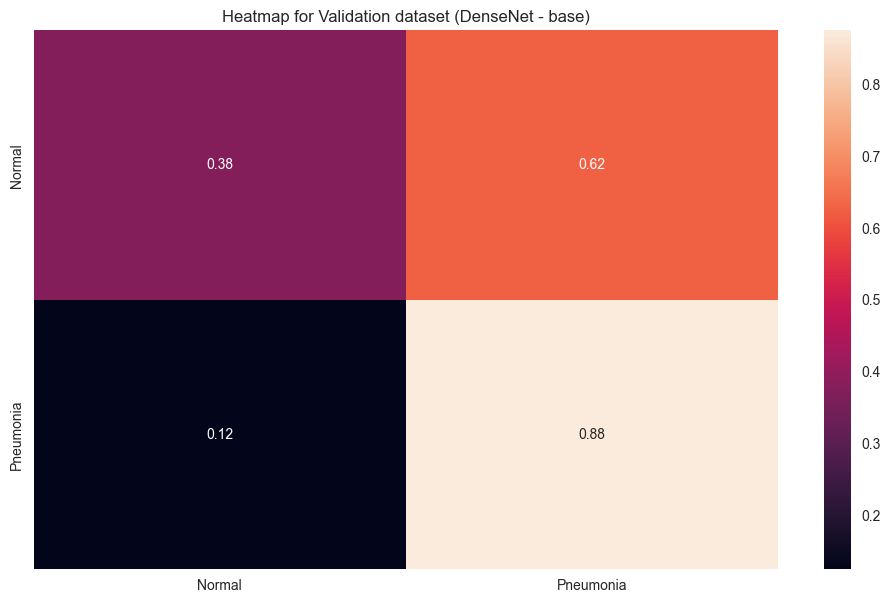

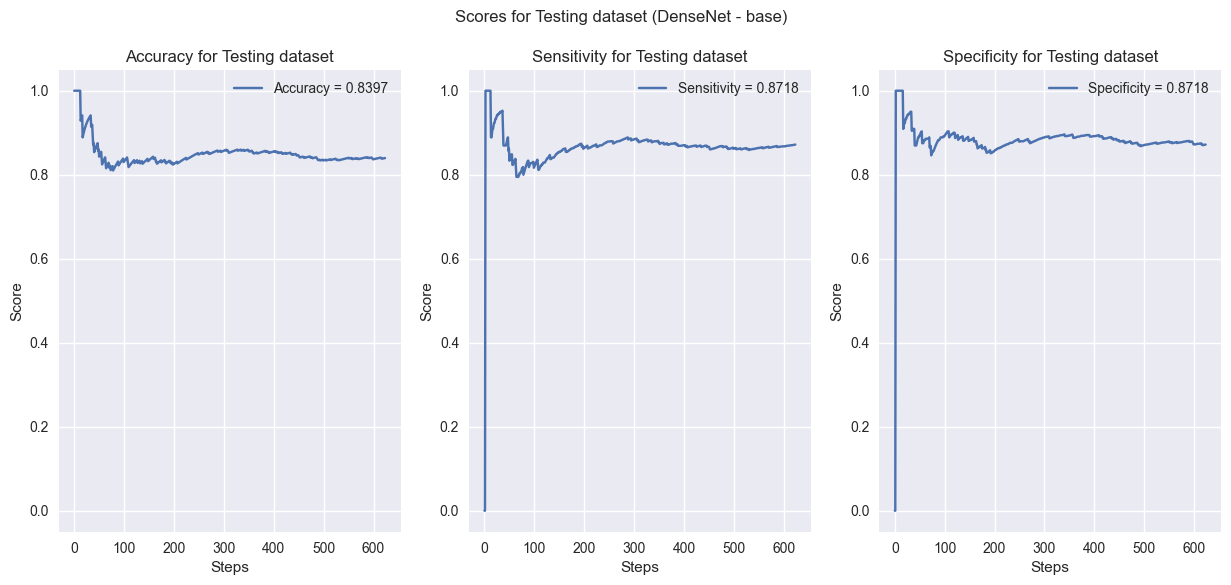

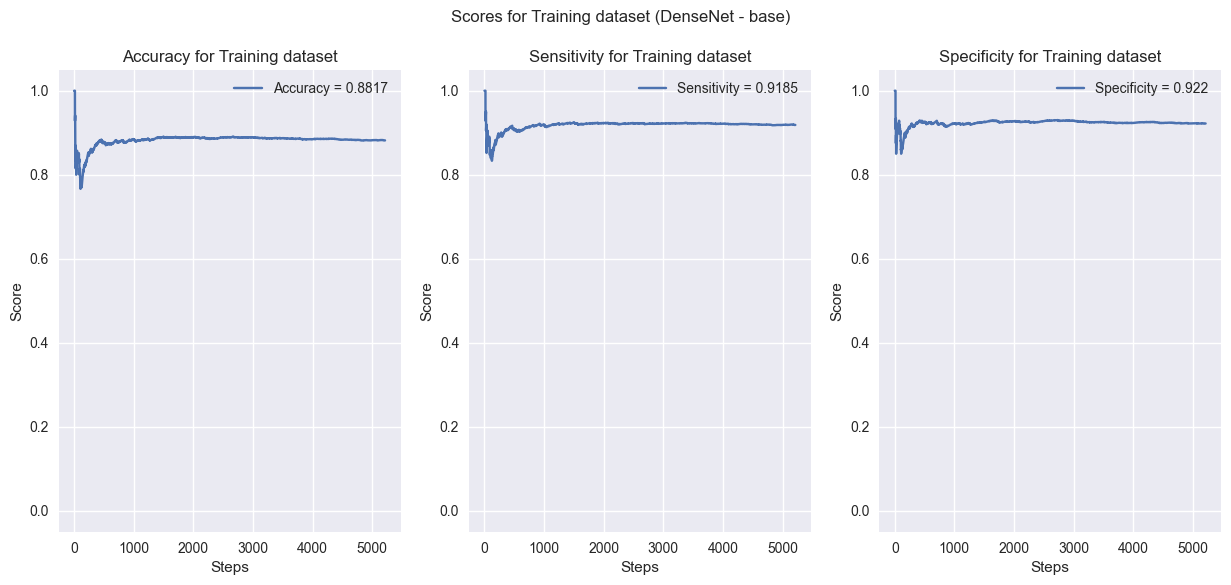

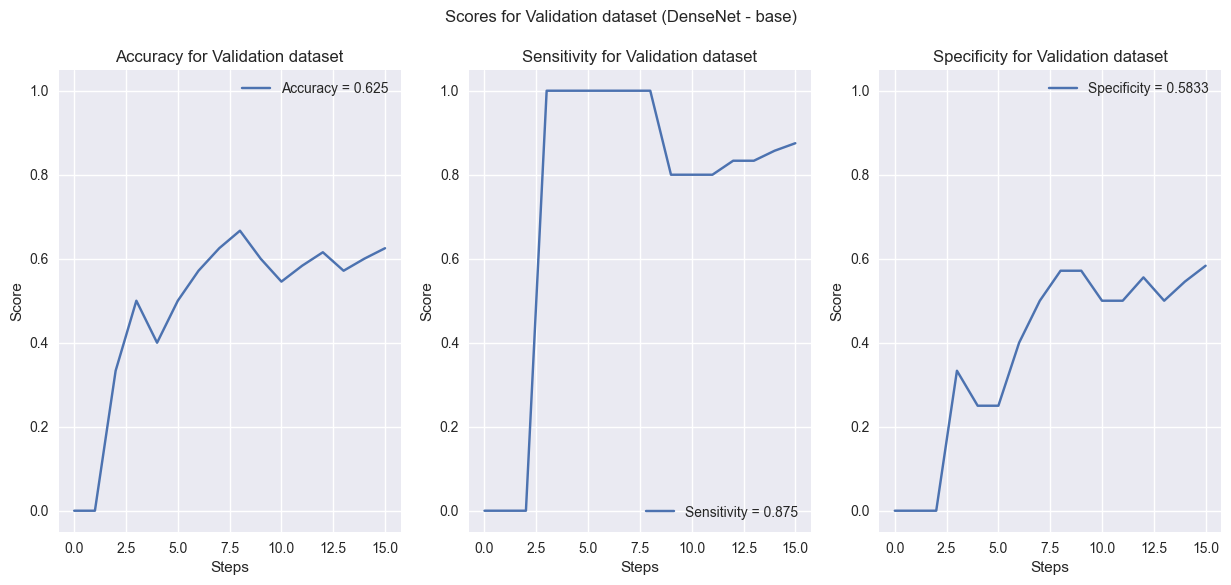

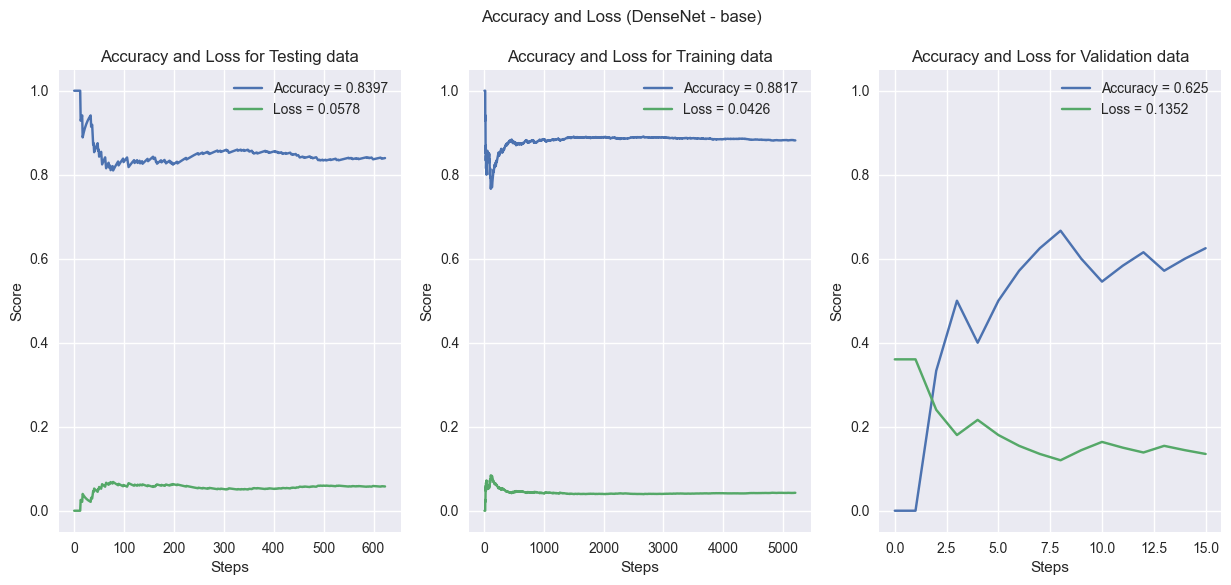

In [197]:
dn_base_eval = plotting(dn_base, dataloaders_dn, 'DenseNet - base')

In [198]:
torch.cuda.empty_cache()

## CNN

### Create model

In [199]:
# https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

class CNNModel(nn.Module):
    def __init__(self, num_classes = 2):
        super().__init__()
        
        # Constraints for layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=5, stride = 1, padding=2)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.25)
        self.pool1 = nn.MaxPool2d(kernel_size=2) #default stride is equivalent to the kernel_size
        
        # Constraints for layer 2
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride = 1, padding=2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.25)
        self.pool2 = nn.MaxPool2d(kernel_size= num_classes)
        
        # Defining the Linear layer
        self.fc = nn.Linear(43808, out_features=2)
    
    # defining the network flow
    def forward(self, X):
        # Conv 1
        X = self.conv1(X)
        X = self.relu1(X)

        # Dropout 1
        X = self.dropout1(X)
        
        # Max Pool 1
        X = self.pool1(X)
        
        # Conv 2
        X = self.conv2(X)
        X = self.relu2(X)

        # Dropout 2
        X = self.dropout2(X)
        
        # Max Pool 2
        X = self.pool2(X)
        
        X = X.view(X.size(0), -1)
        
        # Linear Layer
        X = self.fc(X)
        
        return X

In [45]:
cnn = CNNModel()
cnn = cnn.to(device)

# loss_fn = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn.parameters(), lr=lr)

cnn_exp_lr_scheduler = lr_scheduler.LinearLR(cnn_optimizer, start_factor=1.0, end_factor=0.5, total_iters=total_iters)

In [46]:
train(cnn, dataloaders_cnn, cnn_optimizer, cnn_exp_lr_scheduler, 30, dataset_sizes_cnn, 'CNN')

Epoch 1 of 30
----------
Training initiated
*
Epoch 1: Adam lr 0.0500 -> 0.0482
*
Validation initiated
*
Training Loss: 3.0687 - Training accuracy: 0.7396
Validation Loss: 0.8226 - Validation accuracy: 0.5000
*
Validation loss decreased: inf -> 0.8226
Current validation accuracy: 0.5000
Saving The Model...

Epoch 2 of 30
----------
Training initiated
*
Epoch 2: Adam lr 0.0482 -> 0.0464
*
Validation initiated
*
Training Loss: 0.0287 - Training accuracy: 0.7429
Validation Loss: 0.8098 - Validation accuracy: 0.5000
*
Validation loss decreased: 0.8226 -> 0.8098
Current validation accuracy: 0.5000
Saving The Model...

Epoch 3 of 30
----------
Training initiated
*
Epoch 3: Adam lr 0.0464 -> 0.0446
*
Validation initiated
*
Training Loss: 0.0286 - Training accuracy: 0.7429
Validation Loss: 0.9140 - Validation accuracy: 0.5000
*
Epoch 4 of 30
----------
Training initiated
*
Epoch 4: Adam lr 0.0446 -> 0.0429
*
Validation initiated
*
Training Loss: 0.0287 - Training accuracy: 0.7429
Validation Lo

In [42]:
torch.cuda.empty_cache()

### Evaluation

#### Load model

In [200]:
cnn = CNNModel()
cnn.load_state_dict(torch.load('./models/CNN.pth'))

cnn = cnn.to(device)
# summary(cnn, (3, 150, 150))

#### Get scores and plots

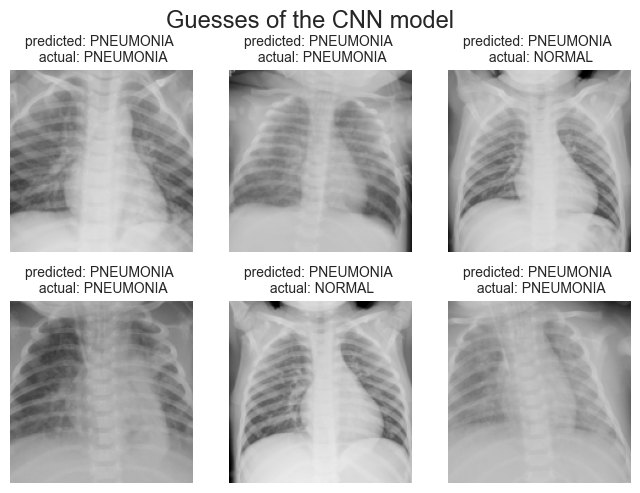

In [202]:
visualize_prediction(cnn, dataloaders_cnn, class_names_cnn, 'CNN', 'CNN')

0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]
0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]
0.5
fpr_lst
[0, 1.0, 1]
tpr_lst
[0, 1.0, 1]


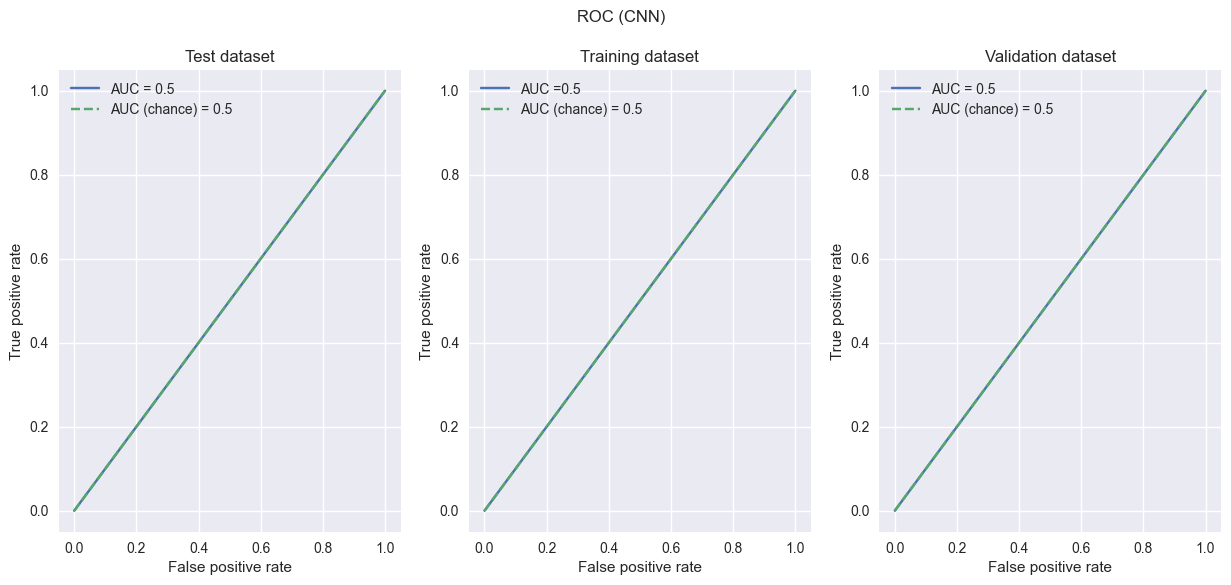

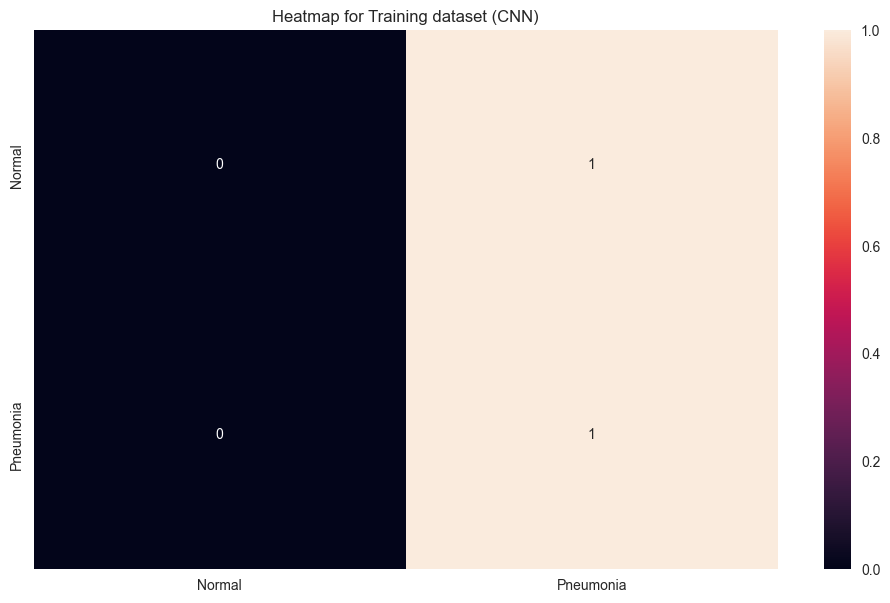

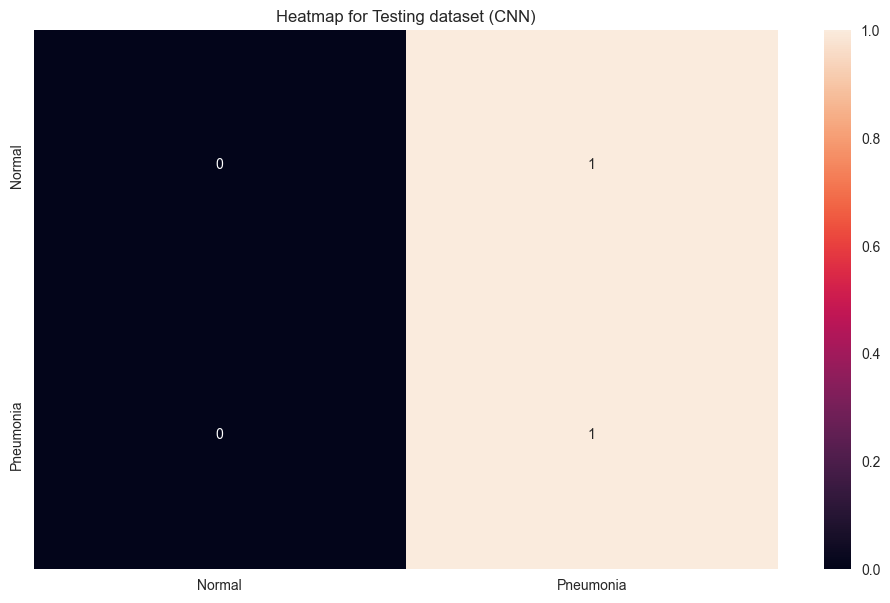

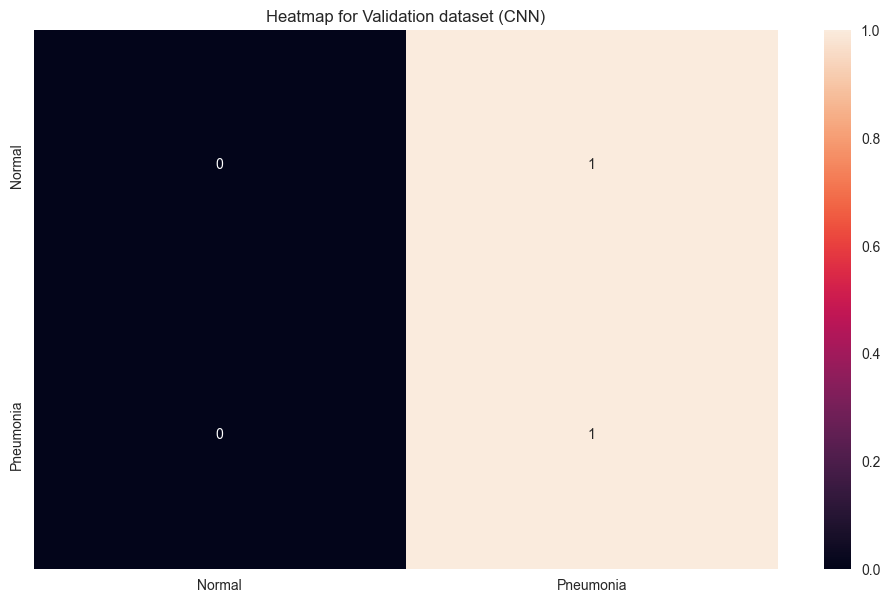

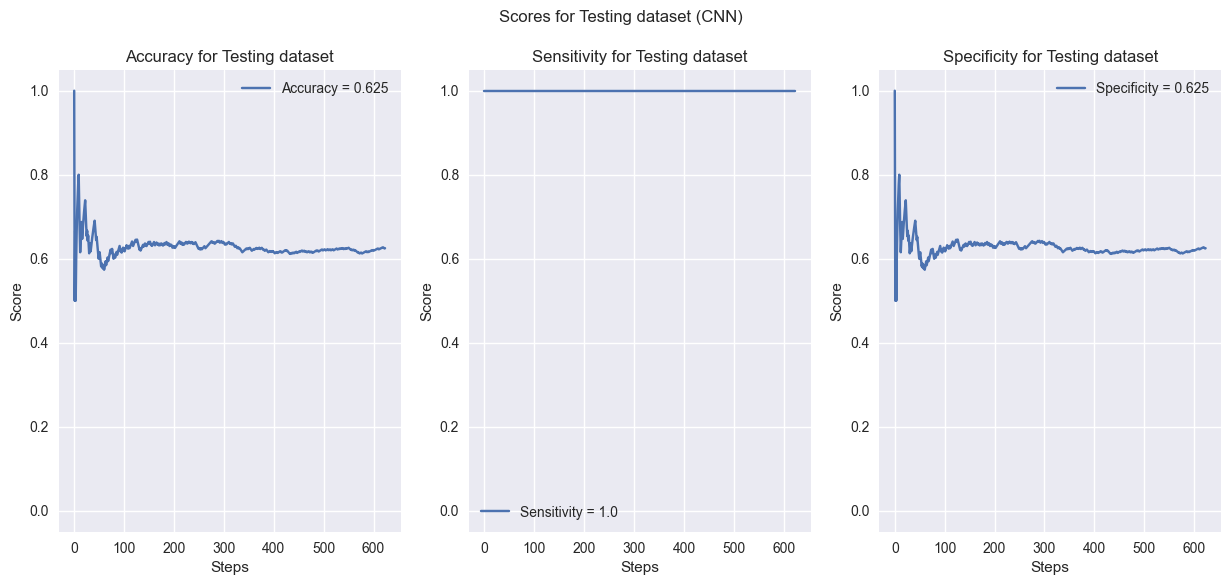

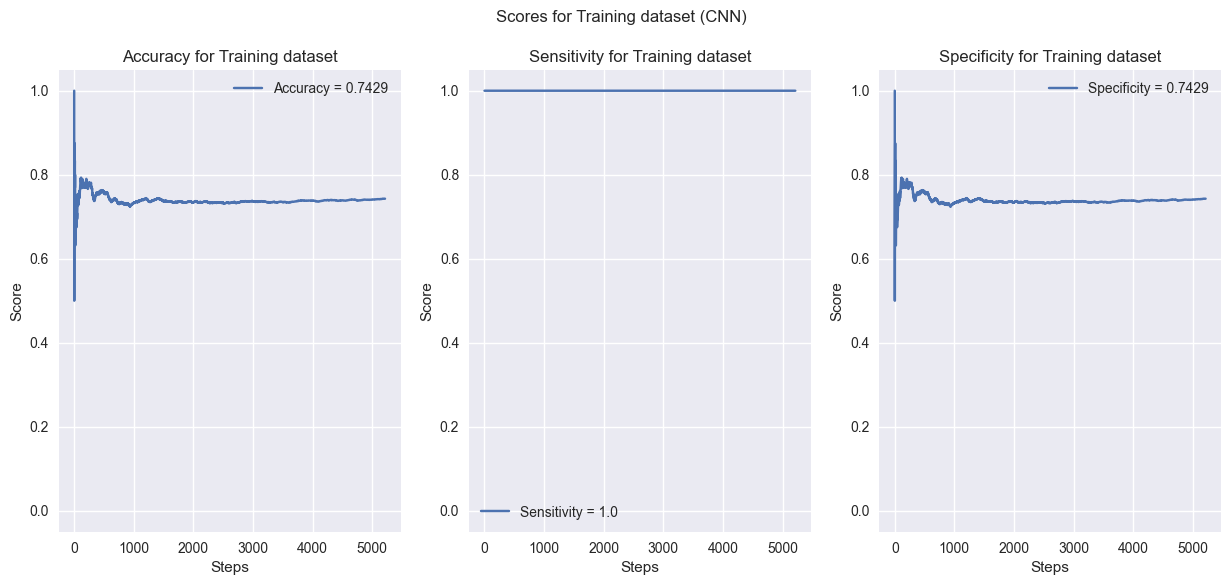

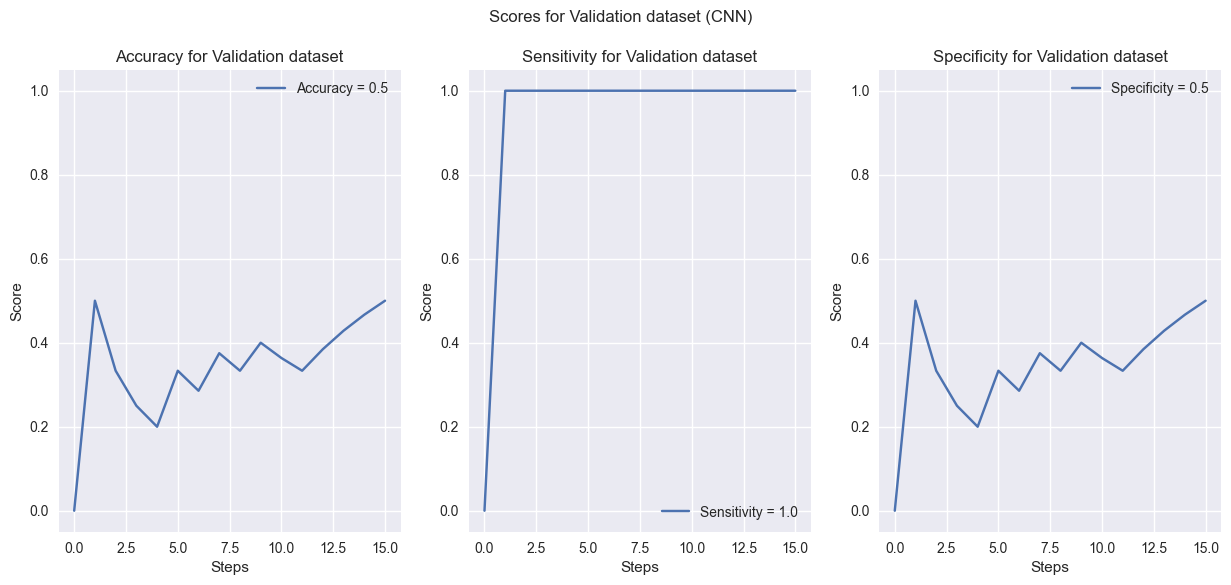

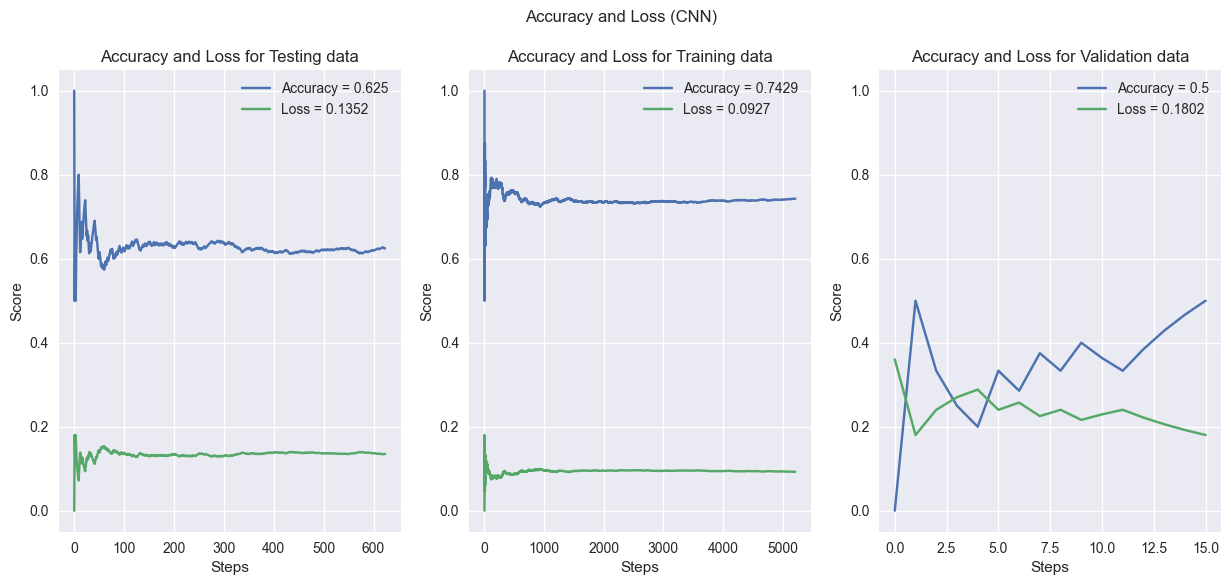

In [203]:
cnn_eval = plotting(cnn, dataloaders_cnn, 'CNN')

# Evaluation comparison

In [227]:
comparative_score = pd.DataFrame({
    'Model': [
        'Comparison model (InceptionV3)', 
        'InceptionV3 (base)', 
        'InceptionV3 (pretrained)', 
        'EfficientnetB3 (base)', 
        'EfficientnetB3 (pretrained)', 
        'DenseNet (base)', 
        'DenseNet (pretrained)',
        'CNN (custom)'
    ],
    'Accuracy': [
        '92.80 %', 
        iv3_base_eval['train'][0], 
        iv3_pretrained_eval['train'][0], 
        enb3_base_eval['train'][0], 
        enb3_pretrained_eval['train'][0], 
        dn_base_eval['train'][0], 
        dn_pretrained_eval['train'][0], 
        cnn_eval['train'][0]
    ], 
    'Sensitivity': [
        '93.20 %', 
        iv3_base_eval['train'][1], 
        iv3_pretrained_eval['train'][1], 
        enb3_base_eval['train'][1], 
        enb3_pretrained_eval['train'][1], 
        dn_base_eval['train'][1], 
        dn_pretrained_eval['train'][1], 
        cnn_eval['train'][1]
    ], 
    'Specificity': [
        '90.01 %', 
        iv3_base_eval['train'][2], 
        iv3_pretrained_eval['train'][2], 
        enb3_base_eval['train'][2], 
        enb3_pretrained_eval['train'][2], 
        dn_base_eval['train'][2], 
        dn_pretrained_eval['train'][2], 
        cnn_eval['train'][2]
    ], 
    'AUC': [
        '96.80 %', 
        iv3_base_eval['train'][4], 
        iv3_pretrained_eval['train'][4], 
        enb3_base_eval['train'][4], 
        enb3_pretrained_eval['train'][4], 
        dn_base_eval['train'][4], 
        dn_pretrained_eval['train'][4], 
        cnn_eval['train'][4]
    ], 
})
comparative_score

Model Accuracy Sensitivity Specificity      AUC
0  Comparison model (InceptionV3)  92.80 %     93.20 %     90.01 %  96.80 %
1              InceptionV3 (base)    73.93       99.51        74.2   0.4975
2        InceptionV3 (pretrained)    42.39       22.79       98.55   0.6091
3           EfficientnetB3 (base)    48.73       33.06       94.12   0.6355
4     EfficientnetB3 (pretrained)     49.0       33.63       93.67   0.6353
5                 DenseNet (base)    88.17       91.85        92.2    0.847
6           DenseNet (pretrained)    25.71         0.0         0.0      0.5
7                    CNN (custom)    74.29       100.0       74.29      0.5